In [1]:
import os
from zipfile import ZipFile
import glob, os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import fnmatch
import datetime as dt
from statistics import median
from matplotlib.ticker import PercentFormatter
from matplotlib import font_manager as fm

In [2]:
zip_files=glob.glob('Bases/*.zip')
extracted_files=glob.glob('*.csv')
#zip_files
num_files=len(zip_files)
print(extracted_files)

['200412COVID19MEXICO.csv', '200413COVID19MEXICO.csv', '200414COVID19MEXICO.csv', '200415COVID19MEXICO.csv', '200416COVID19MEXICO.csv', '200417COVID19MEXICO.csv', '200418COVID19MEXICO.csv', '200419COVID19MEXICO.csv', '200420COVID19MEXICO.csv', '200421COVID19MEXICO.csv', '200422COVID19MEXICO.csv', '200423COVID19MEXICO.csv', '200424COVID19MEXICO.csv', '200425COVID19MEXICO.csv', '200426COVID19MEXICO.csv', '200427COVID19MEXICO.csv', '200428COVID19MEXICO.csv', '200429COVID19MEXICO.csv', '200430COVID19MEXICO.csv', '200501COVID19MEXICO.csv', '200502COVID19MEXICO.csv', '200503COVID19MEXICO.csv', '200504COVID19MEXICO.csv', '200505COVID19MEXICO.csv', '200506COVID19MEXICO.csv', '200507COVID19MEXICO.csv', '200508COVID19MEXICO.csv', '200509COVID19MEXICO.csv', '200510COVID19MEXICO.csv', '200511COVID19MEXICO.csv', '200512COVID19MEXICO.csv', '200513COVID19MEXICO.csv', '200514COVID19MEXICO.csv', '200515COVID19MEXICO.csv', '200516COVID19MEXICO.csv', '200517COVID19MEXICO.csv', '200518COVID19MEXICO.csv', 

DATOS DESCARGADOS DESDE https://www.gob.mx/salud/documentos/datos-abiertos-152127

# Obtener información

In [3]:
file_name=zip_files[0]
file_name=file_name.split("Bases\\")[1].split(".zip",1)[0]
file_name

'datos_abiertos_covid19_01.05.2020'

## Extracción de Archivos Zip

In [4]:
for f in range(num_files):
    #print(f)
    file=zip_files[f]
    with ZipFile (file,"r") as zip:
        
        ##GET FILE NAME
        file_name=zip.namelist()
        #print(file_name)
        
        ##SEARCH IF THE FILE WAS ALREADY EXTRACTED BEFORE
        if file_name[0] in extracted_files:
            next
            #print(str(file_name) + "already extracted")
        
        ##IF THE FILE WAS NOT EXTRACTED BEFORE, THEN EXTRACT AND NOTICE
        else:
            print("added" + str(file_name))
            zip.extractall()
            extracted_files=glob.glob('*.csv')

added['200625COVID19MEXICO.csv']


## Carga de bases, catálogo y descriptores 

In [5]:
# CATALOGOS
Catalogos=pd.ExcelFile("diccionario_datos_covid19/Catalogos_0412.xlsx")
Catalogos.sheet_names   

['Catálogo ORIGEN',
 'Catálogo SECTOR',
 'Catálogo SEXO',
 'Catálogo TIPO_PACIENTE',
 'Catálogo SI_NO',
 'Catálogo NACIONALIDAD',
 'Catálogo RESULTADO',
 'Catálogo de ENTIDADES',
 'Catálogo MUNICIPIOS']

In [6]:
pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name="Catálogo TIPO_PACIENTE").head()

,CLAVE,DESCRIPCIÓN
0,1,AMBULATORIO
1,2,HOSPITALIZADO
2,99,NO ESPECIFICADO


In [7]:
pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name="Catálogo RESULTADO").head()

,Unnamed: 0,Unnamed: 1
0,CLAVE,DESCRIPCIÓN
1,1,Positivo SARS-CoV-2
2,2,No positivo SARS-CoV-2
3,3,Resultado pendiente


In [8]:
pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name="Catálogo SI_NO").head()

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


In [9]:
#DESCRIPTORES
Descriptores=pd.read_excel("diccionario_datos_covid19/Descriptores_0419.xlsx")
Descriptores.head()

,Nº,NOMBRE DE VARIABLE,DESCRIPCIÓN DE VARIABLE,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,"La base de datos se alimenta diariamente, esta...",AAAA-MM-DD
1,2,ID_REGISTRO,Número identificador del caso,TEXTO
2,3,ORIGEN,La vigilancia centinela se realiza a través de...,CATÁLOGO: ORIGEN ...
3,4,SECTOR,Identifica el tipo de institución del Sistema ...,CATÁLOGO: SECTOR ...
4,5,ENTIDAD_UM,Identifica la entidad donde se ubica la unidad...,CATALÓGO: ENTIDADES


In [10]:
pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name="Catálogo RESULTADO")

,Unnamed: 0,Unnamed: 1
0,CLAVE,DESCRIPCIÓN
1,1,Positivo SARS-CoV-2
2,2,No positivo SARS-CoV-2
3,3,Resultado pendiente


In [11]:
#Bases de casos
for f in range(len(extracted_files)):
    if f == 0:
        current_file_name=extracted_files[f]
        total_dbs=pd.read_csv(current_file_name)
        fecha_real="20"+current_file_name[0:2]+"-"+current_file_name[2:4]+"-"+current_file_name[4:6]
        
        #Sustituye la Fecha_Actualizacion con la Fecha en el nombre del archivo
        if total_dbs["FECHA_ACTUALIZACION"][0]!=fecha_real:
            total_dbs["FECHA_ACTUALIZACION"]=fecha_real
        
        os.remove(current_file_name)
    else:
        current_file_name=extracted_files[f]
        current_file=pd.read_csv(current_file_name,encoding='latin-1')
        
        fecha_real="20"+current_file_name[0:2]+"-"+current_file_name[2:4]+"-"+current_file_name[4:6]
        
        
        #Sustituye la Fecha_Actualizacion con la Fecha en el nombre del archivo
        if current_file["FECHA_ACTUALIZACION"][0]!=fecha_real:
            current_file["FECHA_ACTUALIZACION"]=fecha_real
            
        total_dbs=total_dbs.append(current_file)
        
        os.remove(current_file_name)

C:\Users\varicoj\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#Comprobación de bases cargads
reportes=total_dbs.FECHA_ACTUALIZACION.unique()
reportes
primer_reporte=reportes.min()
ultimo_reporte=reportes.max()

In [13]:
total_dbs.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

# LIMPIEZA DATA 

## Obtener información de Descriptores 

In [14]:
#Elimina acentos en Descriptores[Formato o Fuente]
Descriptores["FORMATO O FUENTE"]=Descriptores["FORMATO O FUENTE"].str.replace("Á","A")
Descriptores["FORMATO O FUENTE"]=Descriptores["FORMATO O FUENTE"].str.replace("Ó","O")
Descriptores["NOMBRE DE VARIABLE"]=Descriptores["NOMBRE DE VARIABLE"].str.replace("OTRAS_COM","OTRA_COM")
Descriptores

,Nº,NOMBRE DE VARIABLE,DESCRIPCIÓN DE VARIABLE,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,"La base de datos se alimenta diariamente, esta...",AAAA-MM-DD
1,2,ID_REGISTRO,Número identificador del caso,TEXTO
2,3,ORIGEN,La vigilancia centinela se realiza a través de...,CATALOGO: ORIGEN ...
3,4,SECTOR,Identifica el tipo de institución del Sistema ...,CATALOGO: SECTOR ...
4,5,ENTIDAD_UM,Identifica la entidad donde se ubica la unidad...,CATALOGO: ENTIDADES
5,6,SEXO,Identifica al sexo del paciente.,CATALOGO: SEXO
6,7,ENTIDAD_NAC,Identifica la entidad de nacimiento del paciente.,CATALOGO: ENTIDADES
7,8,ENTIDAD_RES,Identifica la entidad de residencia del paciente.,CATALOGO: ENTIDADES
8,9,MUNICIPIO_RES,Identifica el municipio de residencia del paci...,CATALOGO: MUNICIPIOS
9,10,TIPO_PACIENTE,Identifica el tipo de atención que recibió el ...,CATALOGO: TIPO_PACIENTE


In [15]:
total_dbs_columns=list(total_dbs.columns)

ORIGEN=[]
SECTOR=[]
SEXO=[]
TIPO_PACIENTE=[]
SI_NO=[]
NACIONALIDAD=[]
RESULTADO=[]
ENTIDADES=[]
MUNICIPIOS=[]

In [16]:
for c in range (len(total_dbs_columns)):
    #print(c)
    #print(total_dbs_columns[c])
    
    #Determina información en Columna Formato Fuente
    rFoF=Descriptores.loc[Descriptores["NOMBRE DE VARIABLE"]==total_dbs_columns[c],["FORMATO O FUENTE"]]
    FoF=rFoF["FORMATO O FUENTE"][c]
    
    #Si la información contiene Catalogo, entonces hace búsqueda del catálogo para traducir la información
    if "CATALOGO" in FoF:
        cat = rFoF["FORMATO O FUENTE"][c].split(": ",1)[1]
        cat=str(cat.replace(" ",""))
        #print(cat)
        
        if cat == "ORIGEN":
            ORIGEN.append(total_dbs_columns[c])
            #print(ORIGEN)
            
        elif cat == "SECTOR":
            SECTOR.append(total_dbs_columns[c])
            #print(SECTOR)
            
        elif cat =="SEXO":
            SEXO.append(total_dbs_columns[c])
            #print(SEXO)
        
        elif cat =="TIPO_PACIENTE":
            TIPO_PACIENTE.append(total_dbs_columns[c])
            #print(TIPO_PACIENTE)
            
        elif cat =="SI_NO":
            SI_NO.append(total_dbs_columns[c])
            #print(SI_NO)
        
        elif cat=="NACIONALIDAD":
            NACIONALIDAD.append(total_dbs_columns[c])
            #print(NACIONALIDAD)
        
        elif cat=="RESULTADO":
            RESULTADO.append(total_dbs_columns[c])
            #print(RESULTADO)
            
        elif cat=="ENTIDADES":
            ENTIDADES.append(total_dbs_columns[c])
            #print(ENTIDADES)
        
        elif cat=="MUNICIPIOS":
            MUNICIPIOS.append(total_dbs_columns[c])
            #print(MUNICIPIOS)

In [17]:
total_dbs_columns=list(total_dbs.columns)

for c in range (len(total_dbs_columns)):
    #print(c)
    print(total_dbs_columns[c])
    
    #Determina información en Columna Formato Fuente
    rFoF=Descriptores.loc[Descriptores["NOMBRE DE VARIABLE"]==total_dbs_columns[c],["FORMATO O FUENTE"]]
    FoF=rFoF["FORMATO O FUENTE"][c]
    
    #Si la información contiene Catalogo, entonces hace búsqueda del catálogo para traducir la información
    if "CATALOGO" in FoF:
        cat = rFoF["FORMATO O FUENTE"][c].split(": ",1)[1]        
        #print(cat)
        
        #Selecciona hoja de Catálogo para traducir información
        try:      
            sheet="Catálogo "+str(cat.replace(" ",""))
            dbcat=pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name=sheet)
            print("Existe Hoja:" + sheet)
            
            try:
                claves=dbcat.CLAVE.tolist()
                print("Existe CLAVE en " + sheet)
            except:
                try:
                    print("No existe CLAVE en " + sheet)
                    claves=dbcat.CLAVE_MUNICIPIO.tolist()
                except:
                    print("No existe CLAVE en " + sheet)
                    dbcat=pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name=sheet,skiprows=1)
                    claves=dbcat.CLAVE.tolist()
                    print("Existe CLAVE en " + sheet)
        
        except:
            print("No Existe Hoja: "+sheet)         
            sheet="Catálogo de "+str(cat.strip())
            dbcat=pd.read_excel("diccionario_datos_covid19/Catalogos_0412.xlsx",sheet_name=sheet)
            print("Existe Hoja: "+ sheet)
            
            claves=dbcat.CLAVE_ENTIDAD.tolist()
            print("Existe CLAVE_ENTIDAD en " + sheet)
        
        #Sustituye claves por descripciones, revisar con Merge
        #print(claves)
        for cl in range(len(claves)):
            
            try:
                total_dbs[total_dbs_columns[c]]=total_dbs[total_dbs_columns[c]].replace(dbcat["CLAVE"][cl],dbcat["DESCRIPCIÓN"][cl])
                print("Sustituido en " + total_dbs_columns[c])
                print(dbcat["CLAVE"][cl])
                print("con DESCRIPCIÓN " + dbcat["DESCRIPCIÓN"][cl])
            except:
                try:
                    total_dbs[total_dbs_columns[c]]=total_dbs[total_dbs_columns[c]].replace(dbcat["CLAVE_ENTIDAD"][cl],dbcat["ENTIDAD_FEDERATIVA"][cl])
                    print("Sustituido en " + total_dbs_columns[c])
                    print(dbcat["CLAVE_ENTIDAD"][cl])
                    print("con DESCRIPCIÓN " + dbcat["ENTIDAD_FEDERATIVA"][cl])
                except:
                    total_dbs[total_dbs_columns[c]]=total_dbs[total_dbs_columns[c]].replace(dbcat["CLAVE_MUNICIPIO"][cl],dbcat["MUNICIPIO"][cl])
                    print("Sustituido en " + total_dbs_columns[c])
                    print(dbcat["CLAVE_MUNICIPIO"][cl])
                    print("con DESCRIPCIÓN " + dbcat["MUNICIPIO"][cl])

#Hacer listas de columnas que corresponden a cada catálogo
#1. Definir qué catálogo requiere cada columna
#2. Agrupar columnas conforme al catálogo que utilizan
#3. Seleccionar valores de catálogo y sustituir en columnas que apliquen

FECHA_ACTUALIZACION
ID_REGISTRO
ORIGEN
Existe Hoja:Catálogo ORIGEN
Existe CLAVE en Catálogo ORIGEN
Sustituido en ORIGEN
1
con DESCRIPCIÓN USMER
Sustituido en ORIGEN
2
con DESCRIPCIÓN FUERA DE USMER
Sustituido en ORIGEN
99
con DESCRIPCIÓN NO ESPECIFICADO
SECTOR
Existe Hoja:Catálogo SECTOR
Existe CLAVE en Catálogo SECTOR
Sustituido en SECTOR
1
con DESCRIPCIÓN CRUZ ROJA
Sustituido en SECTOR
2
con DESCRIPCIÓN DIF
Sustituido en SECTOR
3
con DESCRIPCIÓN ESTATAL
Sustituido en SECTOR
4
con DESCRIPCIÓN IMSS
Sustituido en SECTOR
5
con DESCRIPCIÓN IMSS-BIENESTAR
Sustituido en SECTOR
6
con DESCRIPCIÓN ISSSTE
Sustituido en SECTOR
7
con DESCRIPCIÓN MUNICIPAL
Sustituido en SECTOR
8
con DESCRIPCIÓN PEMEX
Sustituido en SECTOR
9
con DESCRIPCIÓN PRIVADA
Sustituido en SECTOR
10
con DESCRIPCIÓN SEDENA
Sustituido en SECTOR
11
con DESCRIPCIÓN SEMAR
Sustituido en SECTOR
12
con DESCRIPCIÓN SSA
Sustituido en SECTOR
13
con DESCRIPCIÓN UNIVERSITARIO
Sustituido en SECTOR
99
con DESCRIPCIÓN NO ESPECIFICADO
ENTIDAD_

Sustituido en MUNICIPIO_RES
9
con DESCRIPCIÓN TEPEZALÁ
Sustituido en MUNICIPIO_RES
10
con DESCRIPCIÓN EL LLANO
Sustituido en MUNICIPIO_RES
11
con DESCRIPCIÓN SAN FRANCISCO DE LOS ROMO
Sustituido en MUNICIPIO_RES
999
con DESCRIPCIÓN NO ESPECIFICADO
Sustituido en MUNICIPIO_RES
1
con DESCRIPCIÓN ENSENADA
Sustituido en MUNICIPIO_RES
2
con DESCRIPCIÓN MEXICALI
Sustituido en MUNICIPIO_RES
3
con DESCRIPCIÓN TECATE
Sustituido en MUNICIPIO_RES
4
con DESCRIPCIÓN TIJUANA
Sustituido en MUNICIPIO_RES
5
con DESCRIPCIÓN PLAYAS DE ROSARITO
Sustituido en MUNICIPIO_RES
999
con DESCRIPCIÓN NO ESPECIFICADO
Sustituido en MUNICIPIO_RES
1
con DESCRIPCIÓN COMONDÚ
Sustituido en MUNICIPIO_RES
2
con DESCRIPCIÓN MULEGÉ
Sustituido en MUNICIPIO_RES
3
con DESCRIPCIÓN LA PAZ
Sustituido en MUNICIPIO_RES
8
con DESCRIPCIÓN LOS CABOS
Sustituido en MUNICIPIO_RES
9
con DESCRIPCIÓN LORETO
Sustituido en MUNICIPIO_RES
999
con DESCRIPCIÓN NO ESPECIFICADO
Sustituido en MUNICIPIO_RES
1
con DESCRIPCIÓN CALKINÍ
Sustituido en MUNIC

Sustituido en MUNICIPIO_RES
65
con DESCRIPCIÓN PALENQUE
Sustituido en MUNICIPIO_RES
66
con DESCRIPCIÓN PANTELHÓ
Sustituido en MUNICIPIO_RES
67
con DESCRIPCIÓN PANTEPEC
Sustituido en MUNICIPIO_RES
68
con DESCRIPCIÓN PICHUCALCO
Sustituido en MUNICIPIO_RES
69
con DESCRIPCIÓN PIJIJIAPAN
Sustituido en MUNICIPIO_RES
70
con DESCRIPCIÓN EL PORVENIR
Sustituido en MUNICIPIO_RES
71
con DESCRIPCIÓN VILLA COMALTITLÁN
Sustituido en MUNICIPIO_RES
72
con DESCRIPCIÓN PUEBLO NUEVO SOLISTAHUACÁN
Sustituido en MUNICIPIO_RES
73
con DESCRIPCIÓN RAYÓN
Sustituido en MUNICIPIO_RES
74
con DESCRIPCIÓN REFORMA
Sustituido en MUNICIPIO_RES
75
con DESCRIPCIÓN LAS ROSAS
Sustituido en MUNICIPIO_RES
76
con DESCRIPCIÓN SABANILLA
Sustituido en MUNICIPIO_RES
77
con DESCRIPCIÓN SALTO DE AGUA
Sustituido en MUNICIPIO_RES
78
con DESCRIPCIÓN SAN CRISTÓBAL DE LAS CASAS
Sustituido en MUNICIPIO_RES
79
con DESCRIPCIÓN SAN FERNANDO
Sustituido en MUNICIPIO_RES
80
con DESCRIPCIÓN SILTEPEC
Sustituido en MUNICIPIO_RES
81
con DESCRIPCIÓ

Sustituido en MUNICIPIO_RES
13
con DESCRIPCIÓN XOCHIMILCO
Sustituido en MUNICIPIO_RES
14
con DESCRIPCIÓN BENITO JUÁREZ
Sustituido en MUNICIPIO_RES
15
con DESCRIPCIÓN CUAUHTÉMOC
Sustituido en MUNICIPIO_RES
16
con DESCRIPCIÓN MIGUEL HIDALGO
Sustituido en MUNICIPIO_RES
17
con DESCRIPCIÓN VENUSTIANO CARRANZA
Sustituido en MUNICIPIO_RES
999
con DESCRIPCIÓN NO ESPECIFICADO
Sustituido en MUNICIPIO_RES
1
con DESCRIPCIÓN CANATLÁN
Sustituido en MUNICIPIO_RES
2
con DESCRIPCIÓN CANELAS
Sustituido en MUNICIPIO_RES
3
con DESCRIPCIÓN CONETO DE COMONFORT
Sustituido en MUNICIPIO_RES
4
con DESCRIPCIÓN CUENCAMÉ
Sustituido en MUNICIPIO_RES
5
con DESCRIPCIÓN DURANGO
Sustituido en MUNICIPIO_RES
6
con DESCRIPCIÓN GENERAL SIMÓN BOLÍVAR
Sustituido en MUNICIPIO_RES
7
con DESCRIPCIÓN GÓMEZ PALACIO
Sustituido en MUNICIPIO_RES
8
con DESCRIPCIÓN GUADALUPE VICTORIA
Sustituido en MUNICIPIO_RES
9
con DESCRIPCIÓN GUANACEVÍ
Sustituido en MUNICIPIO_RES
10
con DESCRIPCIÓN HIDALGO
Sustituido en MUNICIPIO_RES
11
con DESCRIP

Sustituido en MUNICIPIO_RES
43
con DESCRIPCIÓN METLATÓNOC
Sustituido en MUNICIPIO_RES
44
con DESCRIPCIÓN MOCHITLÁN
Sustituido en MUNICIPIO_RES
45
con DESCRIPCIÓN OLINALÁ
Sustituido en MUNICIPIO_RES
46
con DESCRIPCIÓN OMETEPEC
Sustituido en MUNICIPIO_RES
47
con DESCRIPCIÓN PEDRO ASCENCIO ALQUISIRAS
Sustituido en MUNICIPIO_RES
48
con DESCRIPCIÓN PETATLÁN
Sustituido en MUNICIPIO_RES
49
con DESCRIPCIÓN PILCAYA
Sustituido en MUNICIPIO_RES
50
con DESCRIPCIÓN PUNGARABATO
Sustituido en MUNICIPIO_RES
51
con DESCRIPCIÓN QUECHULTENANGO
Sustituido en MUNICIPIO_RES
52
con DESCRIPCIÓN SAN LUIS ACATLÁN
Sustituido en MUNICIPIO_RES
53
con DESCRIPCIÓN SAN MARCOS
Sustituido en MUNICIPIO_RES
54
con DESCRIPCIÓN SAN MIGUEL TOTOLAPAN
Sustituido en MUNICIPIO_RES
55
con DESCRIPCIÓN TAXCO DE ALARCÓN
Sustituido en MUNICIPIO_RES
56
con DESCRIPCIÓN TECOANAPA
Sustituido en MUNICIPIO_RES
57
con DESCRIPCIÓN TÉCPAN DE GALEANA
Sustituido en MUNICIPIO_RES
58
con DESCRIPCIÓN TELOLOAPAN
Sustituido en MUNICIPIO_RES
59
con 

Sustituido en MUNICIPIO_RES
10
con DESCRIPCIÓN ATEMAJAC DE BRIZUELA
Sustituido en MUNICIPIO_RES
11
con DESCRIPCIÓN ATENGO
Sustituido en MUNICIPIO_RES
12
con DESCRIPCIÓN ATENGUILLO
Sustituido en MUNICIPIO_RES
13
con DESCRIPCIÓN ATOTONILCO EL ALTO
Sustituido en MUNICIPIO_RES
14
con DESCRIPCIÓN ATOYAC
Sustituido en MUNICIPIO_RES
15
con DESCRIPCIÓN AUTLÁN DE NAVARRO
Sustituido en MUNICIPIO_RES
16
con DESCRIPCIÓN AYOTLÁN
Sustituido en MUNICIPIO_RES
17
con DESCRIPCIÓN AYUTLA
Sustituido en MUNICIPIO_RES
18
con DESCRIPCIÓN LA BARCA
Sustituido en MUNICIPIO_RES
19
con DESCRIPCIÓN BOLAÑOS
Sustituido en MUNICIPIO_RES
20
con DESCRIPCIÓN CABO CORRIENTES
Sustituido en MUNICIPIO_RES
21
con DESCRIPCIÓN CASIMIRO CASTILLO
Sustituido en MUNICIPIO_RES
22
con DESCRIPCIÓN CIHUATLÁN
Sustituido en MUNICIPIO_RES
23
con DESCRIPCIÓN ZAPOTLÁN EL GRANDE
Sustituido en MUNICIPIO_RES
24
con DESCRIPCIÓN COCULA
Sustituido en MUNICIPIO_RES
25
con DESCRIPCIÓN COLOTLÁN
Sustituido en MUNICIPIO_RES
26
con DESCRIPCIÓN CONCEPC

Sustituido en MUNICIPIO_RES
19
con DESCRIPCIÓN CAPULHUAC
Sustituido en MUNICIPIO_RES
20
con DESCRIPCIÓN COACALCO DE BERRIOZÁBAL
Sustituido en MUNICIPIO_RES
21
con DESCRIPCIÓN COATEPEC HARINAS
Sustituido en MUNICIPIO_RES
22
con DESCRIPCIÓN COCOTITLÁN
Sustituido en MUNICIPIO_RES
23
con DESCRIPCIÓN COYOTEPEC
Sustituido en MUNICIPIO_RES
24
con DESCRIPCIÓN CUAUTITLÁN
Sustituido en MUNICIPIO_RES
25
con DESCRIPCIÓN CHALCO
Sustituido en MUNICIPIO_RES
26
con DESCRIPCIÓN CHAPA DE MOTA
Sustituido en MUNICIPIO_RES
27
con DESCRIPCIÓN CHAPULTEPEC
Sustituido en MUNICIPIO_RES
28
con DESCRIPCIÓN CHIAUTLA
Sustituido en MUNICIPIO_RES
29
con DESCRIPCIÓN CHICOLOAPAN
Sustituido en MUNICIPIO_RES
30
con DESCRIPCIÓN CHICONCUAC
Sustituido en MUNICIPIO_RES
31
con DESCRIPCIÓN CHIMALHUACÁN
Sustituido en MUNICIPIO_RES
32
con DESCRIPCIÓN DONATO GUERRA
Sustituido en MUNICIPIO_RES
33
con DESCRIPCIÓN ECATEPEC DE MORELOS
Sustituido en MUNICIPIO_RES
34
con DESCRIPCIÓN ECATZINGO
Sustituido en MUNICIPIO_RES
35
con DESCRIPC

Sustituido en MUNICIPIO_RES
32
con DESCRIPCIÓN ERONGARÍCUARO
Sustituido en MUNICIPIO_RES
33
con DESCRIPCIÓN GABRIEL ZAMORA
Sustituido en MUNICIPIO_RES
34
con DESCRIPCIÓN HIDALGO
Sustituido en MUNICIPIO_RES
35
con DESCRIPCIÓN LA HUACANA
Sustituido en MUNICIPIO_RES
36
con DESCRIPCIÓN HUANDACAREO
Sustituido en MUNICIPIO_RES
37
con DESCRIPCIÓN HUANIQUEO
Sustituido en MUNICIPIO_RES
38
con DESCRIPCIÓN HUETAMO
Sustituido en MUNICIPIO_RES
39
con DESCRIPCIÓN HUIRAMBA
Sustituido en MUNICIPIO_RES
40
con DESCRIPCIÓN INDAPARAPEO
Sustituido en MUNICIPIO_RES
41
con DESCRIPCIÓN IRIMBO
Sustituido en MUNICIPIO_RES
42
con DESCRIPCIÓN IXTLÁN
Sustituido en MUNICIPIO_RES
43
con DESCRIPCIÓN JACONA
Sustituido en MUNICIPIO_RES
44
con DESCRIPCIÓN JIMÉNEZ
Sustituido en MUNICIPIO_RES
45
con DESCRIPCIÓN JIQUILPAN
Sustituido en MUNICIPIO_RES
46
con DESCRIPCIÓN JUÁREZ
Sustituido en MUNICIPIO_RES
47
con DESCRIPCIÓN JUNGAPEO
Sustituido en MUNICIPIO_RES
48
con DESCRIPCIÓN LAGUNILLAS
Sustituido en MUNICIPIO_RES
49
con D

Sustituido en MUNICIPIO_RES
2
con DESCRIPCIÓN AGUALEGUAS
Sustituido en MUNICIPIO_RES
3
con DESCRIPCIÓN LOS ALDAMAS
Sustituido en MUNICIPIO_RES
4
con DESCRIPCIÓN ALLENDE
Sustituido en MUNICIPIO_RES
5
con DESCRIPCIÓN ANÁHUAC
Sustituido en MUNICIPIO_RES
6
con DESCRIPCIÓN APODACA
Sustituido en MUNICIPIO_RES
7
con DESCRIPCIÓN ARAMBERRI
Sustituido en MUNICIPIO_RES
8
con DESCRIPCIÓN BUSTAMANTE
Sustituido en MUNICIPIO_RES
9
con DESCRIPCIÓN CADEREYTA JIMÉNEZ
Sustituido en MUNICIPIO_RES
10
con DESCRIPCIÓN EL CARMEN
Sustituido en MUNICIPIO_RES
11
con DESCRIPCIÓN CERRALVO
Sustituido en MUNICIPIO_RES
12
con DESCRIPCIÓN CIÉNEGA DE FLORES
Sustituido en MUNICIPIO_RES
13
con DESCRIPCIÓN CHINA
Sustituido en MUNICIPIO_RES
14
con DESCRIPCIÓN DOCTOR ARROYO
Sustituido en MUNICIPIO_RES
15
con DESCRIPCIÓN DOCTOR COSS
Sustituido en MUNICIPIO_RES
16
con DESCRIPCIÓN DOCTOR GONZÁLEZ
Sustituido en MUNICIPIO_RES
17
con DESCRIPCIÓN GALEANA
Sustituido en MUNICIPIO_RES
18
con DESCRIPCIÓN GARCÍA
Sustituido en MUNICIPIO

Sustituido en MUNICIPIO_RES
80
con DESCRIPCIÓN SAN AGUSTÍN AMATENGO
Sustituido en MUNICIPIO_RES
81
con DESCRIPCIÓN SAN AGUSTÍN ATENANGO
Sustituido en MUNICIPIO_RES
82
con DESCRIPCIÓN SAN AGUSTÍN CHAYUCO
Sustituido en MUNICIPIO_RES
83
con DESCRIPCIÓN SAN AGUSTÍN DE LAS JUNTAS
Sustituido en MUNICIPIO_RES
84
con DESCRIPCIÓN SAN AGUSTÍN ETLA
Sustituido en MUNICIPIO_RES
85
con DESCRIPCIÓN SAN AGUSTÍN LOXICHA
Sustituido en MUNICIPIO_RES
86
con DESCRIPCIÓN SAN AGUSTÍN TLACOTEPEC
Sustituido en MUNICIPIO_RES
87
con DESCRIPCIÓN SAN AGUSTÍN YATARENI
Sustituido en MUNICIPIO_RES
88
con DESCRIPCIÓN SAN ANDRÉS CABECERA NUEVA
Sustituido en MUNICIPIO_RES
89
con DESCRIPCIÓN SAN ANDRÉS DINICUITI
Sustituido en MUNICIPIO_RES
90
con DESCRIPCIÓN SAN ANDRÉS HUAXPALTEPEC
Sustituido en MUNICIPIO_RES
91
con DESCRIPCIÓN SAN ANDRÉS HUAYÁPAM
Sustituido en MUNICIPIO_RES
92
con DESCRIPCIÓN SAN ANDRÉS IXTLAHUACA
Sustituido en MUNICIPIO_RES
93
con DESCRIPCIÓN SAN ANDRÉS LAGUNAS
Sustituido en MUNICIPIO_RES
94
con DESCRI

Sustituido en MUNICIPIO_RES
197
con DESCRIPCIÓN SAN JUAN GUELAVÍA
Sustituido en MUNICIPIO_RES
198
con DESCRIPCIÓN SAN JUAN GUICHICOVI
Sustituido en MUNICIPIO_RES
199
con DESCRIPCIÓN SAN JUAN IHUALTEPEC
Sustituido en MUNICIPIO_RES
200
con DESCRIPCIÓN SAN JUAN JUQUILA MIXES
Sustituido en MUNICIPIO_RES
201
con DESCRIPCIÓN SAN JUAN JUQUILA VIJANOS
Sustituido en MUNICIPIO_RES
202
con DESCRIPCIÓN SAN JUAN LACHAO
Sustituido en MUNICIPIO_RES
203
con DESCRIPCIÓN SAN JUAN LACHIGALLA
Sustituido en MUNICIPIO_RES
204
con DESCRIPCIÓN SAN JUAN LAJARCIA
Sustituido en MUNICIPIO_RES
205
con DESCRIPCIÓN SAN JUAN LALANA
Sustituido en MUNICIPIO_RES
206
con DESCRIPCIÓN SAN JUAN DE LOS CUÉS
Sustituido en MUNICIPIO_RES
207
con DESCRIPCIÓN SAN JUAN MAZATLÁN
Sustituido en MUNICIPIO_RES
208
con DESCRIPCIÓN SAN JUAN MIXTEPEC
Sustituido en MUNICIPIO_RES
209
con DESCRIPCIÓN SAN JUAN MIXTEPEC
Sustituido en MUNICIPIO_RES
210
con DESCRIPCIÓN SAN JUAN ÑUMÍ
Sustituido en MUNICIPIO_RES
211
con DESCRIPCIÓN SAN JUAN OZOLOT

Sustituido en MUNICIPIO_RES
318
con DESCRIPCIÓN SAN PEDRO MIXTEPEC
Sustituido en MUNICIPIO_RES
319
con DESCRIPCIÓN SAN PEDRO MIXTEPEC
Sustituido en MUNICIPIO_RES
320
con DESCRIPCIÓN SAN PEDRO MOLINOS
Sustituido en MUNICIPIO_RES
321
con DESCRIPCIÓN SAN PEDRO NOPALA
Sustituido en MUNICIPIO_RES
322
con DESCRIPCIÓN SAN PEDRO OCOPETATILLO
Sustituido en MUNICIPIO_RES
323
con DESCRIPCIÓN SAN PEDRO OCOTEPEC
Sustituido en MUNICIPIO_RES
324
con DESCRIPCIÓN SAN PEDRO POCHUTLA
Sustituido en MUNICIPIO_RES
325
con DESCRIPCIÓN SAN PEDRO QUIATONI
Sustituido en MUNICIPIO_RES
326
con DESCRIPCIÓN SAN PEDRO SOCHIÁPAM
Sustituido en MUNICIPIO_RES
327
con DESCRIPCIÓN SAN PEDRO TAPANATEPEC
Sustituido en MUNICIPIO_RES
328
con DESCRIPCIÓN SAN PEDRO TAVICHE
Sustituido en MUNICIPIO_RES
329
con DESCRIPCIÓN SAN PEDRO TEOZACOALCO
Sustituido en MUNICIPIO_RES
330
con DESCRIPCIÓN SAN PEDRO TEUTILA
Sustituido en MUNICIPIO_RES
331
con DESCRIPCIÓN SAN PEDRO TIDAÁ
Sustituido en MUNICIPIO_RES
332
con DESCRIPCIÓN SAN PEDRO T

Sustituido en MUNICIPIO_RES
436
con DESCRIPCIÓN SANTA MARÍA TEXCATITLÁN
Sustituido en MUNICIPIO_RES
437
con DESCRIPCIÓN SANTA MARÍA TLAHUITOLTEPEC
Sustituido en MUNICIPIO_RES
438
con DESCRIPCIÓN SANTA MARÍA TLALIXTAC
Sustituido en MUNICIPIO_RES
439
con DESCRIPCIÓN SANTA MARÍA TONAMECA
Sustituido en MUNICIPIO_RES
440
con DESCRIPCIÓN SANTA MARÍA TOTOLAPILLA
Sustituido en MUNICIPIO_RES
441
con DESCRIPCIÓN SANTA MARÍA XADANI
Sustituido en MUNICIPIO_RES
442
con DESCRIPCIÓN SANTA MARÍA YALINA
Sustituido en MUNICIPIO_RES
443
con DESCRIPCIÓN SANTA MARÍA YAVESÍA
Sustituido en MUNICIPIO_RES
444
con DESCRIPCIÓN SANTA MARÍA YOLOTEPEC
Sustituido en MUNICIPIO_RES
445
con DESCRIPCIÓN SANTA MARÍA YOSOYÚA
Sustituido en MUNICIPIO_RES
446
con DESCRIPCIÓN SANTA MARÍA YUCUHITI
Sustituido en MUNICIPIO_RES
447
con DESCRIPCIÓN SANTA MARÍA ZACATEPEC
Sustituido en MUNICIPIO_RES
448
con DESCRIPCIÓN SANTA MARÍA ZANIZA
Sustituido en MUNICIPIO_RES
449
con DESCRIPCIÓN SANTA MARÍA ZOQUITLÁN
Sustituido en MUNICIPIO_RE

Sustituido en MUNICIPIO_RES
555
con DESCRIPCIÓN TRINIDAD ZAACHILA
Sustituido en MUNICIPIO_RES
556
con DESCRIPCIÓN LA TRINIDAD VISTA HERMOSA
Sustituido en MUNICIPIO_RES
557
con DESCRIPCIÓN UNIÓN HIDALGO
Sustituido en MUNICIPIO_RES
558
con DESCRIPCIÓN VALERIO TRUJANO
Sustituido en MUNICIPIO_RES
559
con DESCRIPCIÓN SAN JUAN BAUTISTA VALLE NACIONAL
Sustituido en MUNICIPIO_RES
560
con DESCRIPCIÓN VILLA DÍAZ ORDAZ
Sustituido en MUNICIPIO_RES
561
con DESCRIPCIÓN YAXE
Sustituido en MUNICIPIO_RES
562
con DESCRIPCIÓN MAGDALENA YODOCONO DE PORFIRIO DÍAZ
Sustituido en MUNICIPIO_RES
563
con DESCRIPCIÓN YOGANA
Sustituido en MUNICIPIO_RES
564
con DESCRIPCIÓN YUTANDUCHI DE GUERRERO
Sustituido en MUNICIPIO_RES
565
con DESCRIPCIÓN VILLA DE ZAACHILA
Sustituido en MUNICIPIO_RES
566
con DESCRIPCIÓN SAN MATEO YUCUTINDOO
Sustituido en MUNICIPIO_RES
567
con DESCRIPCIÓN ZAPOTITLÁN LAGUNAS
Sustituido en MUNICIPIO_RES
568
con DESCRIPCIÓN ZAPOTITLÁN PALMAS
Sustituido en MUNICIPIO_RES
569
con DESCRIPCIÓN SANTA INÉ

Sustituido en MUNICIPIO_RES
121
con DESCRIPCIÓN SAN DIEGO LA MESA TOCHIMILTZINGO
Sustituido en MUNICIPIO_RES
122
con DESCRIPCIÓN SAN FELIPE TEOTLALCINGO
Sustituido en MUNICIPIO_RES
123
con DESCRIPCIÓN SAN FELIPE TEPATLÁN
Sustituido en MUNICIPIO_RES
124
con DESCRIPCIÓN SAN GABRIEL CHILAC
Sustituido en MUNICIPIO_RES
125
con DESCRIPCIÓN SAN GREGORIO ATZOMPA
Sustituido en MUNICIPIO_RES
126
con DESCRIPCIÓN SAN JERÓNIMO TECUANIPAN
Sustituido en MUNICIPIO_RES
127
con DESCRIPCIÓN SAN JERÓNIMO XAYACATLÁN
Sustituido en MUNICIPIO_RES
128
con DESCRIPCIÓN SAN JOSÉ CHIAPA
Sustituido en MUNICIPIO_RES
129
con DESCRIPCIÓN SAN JOSÉ MIAHUATLÁN
Sustituido en MUNICIPIO_RES
130
con DESCRIPCIÓN SAN JUAN ATENCO
Sustituido en MUNICIPIO_RES
131
con DESCRIPCIÓN SAN JUAN ATZOMPA
Sustituido en MUNICIPIO_RES
132
con DESCRIPCIÓN SAN MARTÍN TEXMELUCAN
Sustituido en MUNICIPIO_RES
133
con DESCRIPCIÓN SAN MARTÍN TOTOLTEPEC
Sustituido en MUNICIPIO_RES
134
con DESCRIPCIÓN SAN MATÍAS TLALANCALECA
Sustituido en MUNICIPIO_RE

Sustituido en MUNICIPIO_RES
2
con DESCRIPCIÓN ALAQUINES
Sustituido en MUNICIPIO_RES
3
con DESCRIPCIÓN AQUISMÓN
Sustituido en MUNICIPIO_RES
4
con DESCRIPCIÓN ARMADILLO DE LOS INFANTE
Sustituido en MUNICIPIO_RES
5
con DESCRIPCIÓN CÁRDENAS
Sustituido en MUNICIPIO_RES
6
con DESCRIPCIÓN CATORCE
Sustituido en MUNICIPIO_RES
7
con DESCRIPCIÓN CEDRAL
Sustituido en MUNICIPIO_RES
8
con DESCRIPCIÓN CERRITOS
Sustituido en MUNICIPIO_RES
9
con DESCRIPCIÓN CERRO DE SAN PEDRO
Sustituido en MUNICIPIO_RES
10
con DESCRIPCIÓN CIUDAD DEL MAÍZ
Sustituido en MUNICIPIO_RES
11
con DESCRIPCIÓN CIUDAD FERNÁNDEZ
Sustituido en MUNICIPIO_RES
12
con DESCRIPCIÓN TANCANHUITZ
Sustituido en MUNICIPIO_RES
13
con DESCRIPCIÓN CIUDAD VALLES
Sustituido en MUNICIPIO_RES
14
con DESCRIPCIÓN COXCATLÁN
Sustituido en MUNICIPIO_RES
15
con DESCRIPCIÓN CHARCAS
Sustituido en MUNICIPIO_RES
16
con DESCRIPCIÓN EBANO
Sustituido en MUNICIPIO_RES
17
con DESCRIPCIÓN GUADALCÁZAR
Sustituido en MUNICIPIO_RES
18
con DESCRIPCIÓN HUEHUETLÁN
Sustitu

Sustituido en MUNICIPIO_RES
65
con DESCRIPCIÓN TUBUTAMA
Sustituido en MUNICIPIO_RES
66
con DESCRIPCIÓN URES
Sustituido en MUNICIPIO_RES
67
con DESCRIPCIÓN VILLA HIDALGO
Sustituido en MUNICIPIO_RES
68
con DESCRIPCIÓN VILLA PESQUEIRA
Sustituido en MUNICIPIO_RES
69
con DESCRIPCIÓN YÉCORA
Sustituido en MUNICIPIO_RES
70
con DESCRIPCIÓN GENERAL PLUTARCO ELÍAS CALLES
Sustituido en MUNICIPIO_RES
71
con DESCRIPCIÓN BENITO JUÁREZ
Sustituido en MUNICIPIO_RES
72
con DESCRIPCIÓN SAN IGNACIO RÍO MUERTO
Sustituido en MUNICIPIO_RES
999
con DESCRIPCIÓN NO ESPECIFICADO
Sustituido en MUNICIPIO_RES
1
con DESCRIPCIÓN BALANCÁN
Sustituido en MUNICIPIO_RES
2
con DESCRIPCIÓN CÁRDENAS
Sustituido en MUNICIPIO_RES
3
con DESCRIPCIÓN CENTLA
Sustituido en MUNICIPIO_RES
4
con DESCRIPCIÓN CENTRO
Sustituido en MUNICIPIO_RES
5
con DESCRIPCIÓN COMALCALCO
Sustituido en MUNICIPIO_RES
6
con DESCRIPCIÓN CUNDUACÁN
Sustituido en MUNICIPIO_RES
7
con DESCRIPCIÓN EMILIANO ZAPATA
Sustituido en MUNICIPIO_RES
8
con DESCRIPCIÓN HUIMA

Sustituido en MUNICIPIO_RES
5
con DESCRIPCIÓN ACULA
Sustituido en MUNICIPIO_RES
6
con DESCRIPCIÓN ACULTZINGO
Sustituido en MUNICIPIO_RES
7
con DESCRIPCIÓN CAMARÓN DE TEJEDA
Sustituido en MUNICIPIO_RES
8
con DESCRIPCIÓN ALPATLÁHUAC
Sustituido en MUNICIPIO_RES
9
con DESCRIPCIÓN ALTO LUCERO DE GUTIÉRREZ BARRIOS
Sustituido en MUNICIPIO_RES
10
con DESCRIPCIÓN ALTOTONGA
Sustituido en MUNICIPIO_RES
11
con DESCRIPCIÓN ALVARADO
Sustituido en MUNICIPIO_RES
12
con DESCRIPCIÓN AMATITLÁN
Sustituido en MUNICIPIO_RES
13
con DESCRIPCIÓN NARANJOS AMATLÁN
Sustituido en MUNICIPIO_RES
14
con DESCRIPCIÓN AMATLÁN DE LOS REYES
Sustituido en MUNICIPIO_RES
15
con DESCRIPCIÓN ANGEL R. CABADA
Sustituido en MUNICIPIO_RES
16
con DESCRIPCIÓN LA ANTIGUA
Sustituido en MUNICIPIO_RES
17
con DESCRIPCIÓN APAZAPAN
Sustituido en MUNICIPIO_RES
18
con DESCRIPCIÓN AQUILA
Sustituido en MUNICIPIO_RES
19
con DESCRIPCIÓN ASTACINGA
Sustituido en MUNICIPIO_RES
20
con DESCRIPCIÓN ATLAHUILCO
Sustituido en MUNICIPIO_RES
21
con DESCRIP

Sustituido en MUNICIPIO_RES
142
con DESCRIPCIÓN SAN JUAN EVANGELISTA
Sustituido en MUNICIPIO_RES
143
con DESCRIPCIÓN SANTIAGO TUXTLA
Sustituido en MUNICIPIO_RES
144
con DESCRIPCIÓN SAYULA DE ALEMÁN
Sustituido en MUNICIPIO_RES
145
con DESCRIPCIÓN SOCONUSCO
Sustituido en MUNICIPIO_RES
146
con DESCRIPCIÓN SOCHIAPA
Sustituido en MUNICIPIO_RES
147
con DESCRIPCIÓN SOLEDAD ATZOMPA
Sustituido en MUNICIPIO_RES
148
con DESCRIPCIÓN SOLEDAD DE DOBLADO
Sustituido en MUNICIPIO_RES
149
con DESCRIPCIÓN SOTEAPAN
Sustituido en MUNICIPIO_RES
150
con DESCRIPCIÓN TAMALÍN
Sustituido en MUNICIPIO_RES
151
con DESCRIPCIÓN TAMIAHUA
Sustituido en MUNICIPIO_RES
152
con DESCRIPCIÓN TAMPICO ALTO
Sustituido en MUNICIPIO_RES
153
con DESCRIPCIÓN TANCOCO
Sustituido en MUNICIPIO_RES
154
con DESCRIPCIÓN TANTIMA
Sustituido en MUNICIPIO_RES
155
con DESCRIPCIÓN TANTOYUCA
Sustituido en MUNICIPIO_RES
156
con DESCRIPCIÓN TATATILA
Sustituido en MUNICIPIO_RES
157
con DESCRIPCIÓN CASTILLO DE TEAYO
Sustituido en MUNICIPIO_RES
158


Sustituido en MUNICIPIO_RES
71
con DESCRIPCIÓN SUDZAL
Sustituido en MUNICIPIO_RES
72
con DESCRIPCIÓN SUMA
Sustituido en MUNICIPIO_RES
73
con DESCRIPCIÓN TAHDZIÚ
Sustituido en MUNICIPIO_RES
74
con DESCRIPCIÓN TAHMEK
Sustituido en MUNICIPIO_RES
75
con DESCRIPCIÓN TEABO
Sustituido en MUNICIPIO_RES
76
con DESCRIPCIÓN TECOH
Sustituido en MUNICIPIO_RES
77
con DESCRIPCIÓN TEKAL DE VENEGAS
Sustituido en MUNICIPIO_RES
78
con DESCRIPCIÓN TEKANTÓ
Sustituido en MUNICIPIO_RES
79
con DESCRIPCIÓN TEKAX
Sustituido en MUNICIPIO_RES
80
con DESCRIPCIÓN TEKIT
Sustituido en MUNICIPIO_RES
81
con DESCRIPCIÓN TEKOM
Sustituido en MUNICIPIO_RES
82
con DESCRIPCIÓN TELCHAC PUEBLO
Sustituido en MUNICIPIO_RES
83
con DESCRIPCIÓN TELCHAC PUERTO
Sustituido en MUNICIPIO_RES
84
con DESCRIPCIÓN TEMAX
Sustituido en MUNICIPIO_RES
85
con DESCRIPCIÓN TEMOZÓN
Sustituido en MUNICIPIO_RES
86
con DESCRIPCIÓN TEPAKÁN
Sustituido en MUNICIPIO_RES
87
con DESCRIPCIÓN TETIZ
Sustituido en MUNICIPIO_RES
88
con DESCRIPCIÓN TEYA
Sustituid

Sustituido en EPOC
2
con DESCRIPCIÓN NO 
Sustituido en EPOC
97
con DESCRIPCIÓN NO APLICA
Sustituido en EPOC
98
con DESCRIPCIÓN SE IGNORA
Sustituido en EPOC
99
con DESCRIPCIÓN NO ESPECIFICADO
ASMA
Existe Hoja:Catálogo SI_NO
Existe CLAVE en Catálogo SI_NO
Sustituido en ASMA
1
con DESCRIPCIÓN SI 
Sustituido en ASMA
2
con DESCRIPCIÓN NO 
Sustituido en ASMA
97
con DESCRIPCIÓN NO APLICA
Sustituido en ASMA
98
con DESCRIPCIÓN SE IGNORA
Sustituido en ASMA
99
con DESCRIPCIÓN NO ESPECIFICADO
INMUSUPR
Existe Hoja:Catálogo SI_NO
Existe CLAVE en Catálogo SI_NO
Sustituido en INMUSUPR
1
con DESCRIPCIÓN SI 
Sustituido en INMUSUPR
2
con DESCRIPCIÓN NO 
Sustituido en INMUSUPR
97
con DESCRIPCIÓN NO APLICA
Sustituido en INMUSUPR
98
con DESCRIPCIÓN SE IGNORA
Sustituido en INMUSUPR
99
con DESCRIPCIÓN NO ESPECIFICADO
HIPERTENSION
Existe Hoja:Catálogo SI_NO
Existe CLAVE en Catálogo SI_NO
Sustituido en HIPERTENSION
1
con DESCRIPCIÓN SI 
Sustituido en HIPERTENSION
2
con DESCRIPCIÓN NO 
Sustituido en HIPERTENSION

In [18]:
#total_dbs.tail()
total_dbs.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

# INCONSISTENCIAS Y MANEJO DE ESTAS

## Inconsistencia 1: Fecha menor a 2020
Se elimina dato

## 2 fechas por ID
Se mantiene fecha de última actualización, se asume corrección de error previo
Se descartan defunciones anteriores a 2020

## Fecha de Actualización previa a Fecha de Defunción
Se asume fecha de defunción igual a fecha de actualización

# ÚLTIMA ACTUALIZACIÓN DISPONIBLE

In [19]:
ultima_dbs=total_dbs.loc[total_dbs["FECHA_ACTUALIZACION"]==ultimo_reporte,:]
ultima_dbs.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-06-25,05d1df,FUERA DE USMER,ESTATAL,MÉXICO,HOMBRE,PUEBLA,MÉXICO,SAN PEDRO,AMBULATORIO,...,SI,NO,NO,NO,NO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA
1,2020-06-25,171184,FUERA DE USMER,ESTATAL,BAJA CALIFORNIA,MUJER,BAJA CALIFORNIA,BAJA CALIFORNIA,ASIENTOS,AMBULATORIO,...,NO,SI,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA
2,2020-06-25,0e3aff,FUERA DE USMER,IMSS,JALISCO,MUJER,BAJA CALIFORNIA SUR,JALISCO,TONALÁ,HOSPITALIZADO,...,NO,NO,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO
3,2020-06-25,082c0d,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,MATAMOROS,AMBULATORIO,...,NO,SI,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA
4,2020-06-25,1dbf3b,FUERA DE USMER,ESTATAL,TABASCO,MUJER,TABASCO,TABASCO,COSÍO,AMBULATORIO,...,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA


# ANÁLISIS DEFUNCIONES

## Total Defunciones (Nacional) 

In [20]:
#Descartar pacientes vivos de la base total

defunciones_total_dbs=total_dbs.loc[(total_dbs["FECHA_DEF"] != "9999-99-99"),:]
defunciones_total_dbs.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
101,2020-04-12,135abc,FUERA DE USMER,SSA,JALISCO,MUJER,NO ESPECIFICADO,JALISCO,TUMBALÁ,AMBULATORIO,...,NO,SI,NO,NO,NO,Positivo SARS-CoV-2,NO ESPECIFICADO,Estados Unidos de América,97,NO APLICA
228,2020-04-12,00d588,FUERA DE USMER,IMSS,JALISCO,MUJER,JALISCO,JALISCO,TONALÁ,HOSPITALIZADO,...,NO,NO,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,México,97,NO
317,2020-04-12,137e88,FUERA DE USMER,IMSS-BIENESTAR,TAMAULIPAS,HOMBRE,TAMAULIPAS,TAMAULIPAS,SIERRA MOJADA,HOSPITALIZADO,...,NO,NO,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,México,97,NO
414,2020-04-12,1d2ae3,FUERA DE USMER,IMSS,SAN LUIS POTOSÍ,MUJER,SAN LUIS POTOSÍ,SAN LUIS POTOSÍ,HUITIUPÁN,HOSPITALIZADO,...,NO,NO,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,México,97,NO
456,2020-04-12,1b403b,USMER,IMSS,MÉXICO,HOMBRE,NO ESPECIFICADO,MÉXICO,PIEDRAS NEGRAS,HOSPITALIZADO,...,SI,SI,SI,SI,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,México,97,NO


#### INCONSISTENCIA 1: FECHAS MENORES A 2020
Se eliminan casos

In [21]:
inconsistencia_1=defunciones_total_dbs.loc[(defunciones_total_dbs["FECHA_DEF"] < "2020-01-01"),:]
inconsistencia_1=inconsistencia_1.loc[:,["FECHA_ACTUALIZACION","ID_REGISTRO","FECHA_DEF"]]
inconsistencia_1_casos=inconsistencia_1.groupby(["ID_REGISTRO","FECHA_DEF"]).max()
inconsistencia_1_casos

,,FECHA_ACTUALIZACION
ID_REGISTRO,FECHA_DEF,
03eb1e,2019-04-25,2020-04-29
13983d,2002-06-10,2020-06-12
179219,2000-05-27,2020-06-08


In [22]:
#Definir si los casos fueron correjidos, agregar corrección a base

In [23]:
#Descartar casos de Inconsistencia 1

defunciones_total_dbs=defunciones_total_dbs.loc[(defunciones_total_dbs["FECHA_DEF"] >= "2020-01-01"),:]
defunciones_total_dbs["FECHA_DEF"].unique()

array(['2020-03-26', '2020-03-28', '2020-04-02', '2020-03-30',
       '2020-04-08', '2020-04-05', '2020-03-18', '2020-04-01',
       '2020-04-03', '2020-04-11', '2020-04-07', '2020-03-31',
       '2020-04-04', '2020-04-06', '2020-04-09', '2020-04-12',
       '2020-03-25', '2020-03-29', '2020-03-24', '2020-04-10',
       '2020-03-27', '2020-03-20', '2020-03-22', '2020-03-17',
       '2020-01-11', '2020-03-09', '2020-01-13', '2020-03-23',
       '2020-04-13', '2020-02-10', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-01-29', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-03-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-01-15', '2020-04-23', '2020-04-24',
       '2020-03-04', '2020-01-23', '2020-04-25', '2020-02-23',
       '2020-03-16', '2020-04-26', '2020-04-27', '2020-04-28',
       '2020-04-29', '2020-02-28', '2020-04-30', '2020-05-01',
       '2020-02-15', '2020-05-02', '2020-05-03', '2020-05-04',
       '2020-05-05', '2020-03-11', '2020-03-12', '2020-

### INCONSISTENCIA 2: FECHAS DE DEFUNCIÓN DIFERENTES PARA MISMO PACIENTE
Se asume que la fecha registrada en la última base de datos es la más certera

In [24]:
inconsistencia_2=defunciones_total_dbs.loc[:,["ID_REGISTRO","FECHA_DEF","FECHA_ACTUALIZACION"]]
inconsistencia_2=inconsistencia_2.groupby(["ID_REGISTRO","FECHA_DEF"],as_index=False).count()
inconsistencia_2=inconsistencia_2.groupby(["ID_REGISTRO"],as_index=False).count()
inconsistencia_2=inconsistencia_2.loc[(inconsistencia_2["FECHA_DEF"]>1),["ID_REGISTRO","FECHA_DEF"]]
inconsistencia_2.count()

ID_REGISTRO    86
FECHA_DEF      86
dtype: int64

In [25]:
#Se asume que la fecha registrada en la última base de datos como la más cierta
fecha_defuncion=ultima_dbs.loc[(ultima_dbs["FECHA_DEF"] != "9999-99-99") & (ultima_dbs["FECHA_DEF"] >="2020-01-01"),["FECHA_DEF","ENTIDAD_UM","ID_REGISTRO","RESULTADO"]]

#Obtener fecha de registro de muerte de cada paciente (primer base de datos que se reportó la muerte)
fecha_registro=defunciones_total_dbs.loc[:,["ID_REGISTRO","FECHA_ACTUALIZACION"]]
fecha_registro=fecha_registro.groupby(["ID_REGISTRO"],as_index=False).min()

#Base para análisis de defunciones diarias, atrasos de notificación (relacionado a tiempo desde la defunción)
defunciones_consolidado_tiempo=fecha_registro.merge(fecha_defuncion,on="ID_REGISTRO")
defunciones_consolidado_tiempo.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2


### Atraso de Resultado Vs Fecha Defunción

In [26]:
#Formato de fechas
defunciones_consolidado_tiempo["FECHA_DEF"]=pd.to_datetime(defunciones_consolidado_tiempo["FECHA_DEF"].str.strip(), format="%Y-%m-%d")
defunciones_consolidado_tiempo["FECHA_ACTUALIZACION"]=pd.to_datetime(defunciones_consolidado_tiempo["FECHA_ACTUALIZACION"], format="%Y-%m-%d")
defunciones_consolidado_tiempo.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2


In [27]:
defunciones_consolidado_tiempo["ATRASO_NOTIFICACION"]=(defunciones_consolidado_tiempo["FECHA_ACTUALIZACION"]-defunciones_consolidado_tiempo["FECHA_DEF"]).dt.days
defunciones_consolidado_tiempo.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24


### Muertes confirmadas por rango de días

Confirmados dentro de los primeros 3 días (expectativa normal)

Confirmados hasta 7 días después (atraso dentro de lo esperado)

Confirmados hasta 2 semanas después (atraso doble a lo esperado)

Confirmados después de 2 semanas (atraso excesivo)

In [28]:
bins=[-1,3,7,14,max(defunciones_consolidado_tiempo["ATRASO_NOTIFICACION"])]
atraso_etiquetas=("72hrs", "1 semana","2 semanas", "+2 semanas")

defunciones_consolidado_tiempo["RANGO_ATRASO"]=pd.cut(defunciones_consolidado_tiempo["ATRASO_NOTIFICACION"],bins,labels=atraso_etiquetas)
defunciones_consolidado_tiempo.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION,RANGO_ATRASO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2,72hrs
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0,72hrs
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10,2 semanas
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5,1 semana
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24,+2 semanas


### Estadísticas directas 

#### Casos por Resultado 
De los casos registrados, cuántos y en qué porcentaje han resultado como Positivo SARS-CoV-2, No Positivo SARS-CoV-2 y cuántos se mantienen pendientes de resultado

In [29]:
defunciones_resultado=defunciones_consolidado_tiempo.loc[:,["RESULTADO","ID_REGISTRO"]]
defunciones_resultado=defunciones_resultado.groupby(["RESULTADO"], as_index=False).count()
defunciones_resultado=defunciones_resultado.rename(columns={"ID_REGISTRO":"NUM_CASOS"})
defunciones_resultado=defunciones_resultado.sort_values(by=["NUM_CASOS"])
defunciones_resultado

,RESULTADO,NUM_CASOS
2,Resultado pendiente,1966
0,No positivo SARS-CoV-2,6570
1,Positivo SARS-CoV-2,25060


Text(0.5,1,'DISTRIBUCIÓN DE DEFUNCIONES POR RESULTADO')

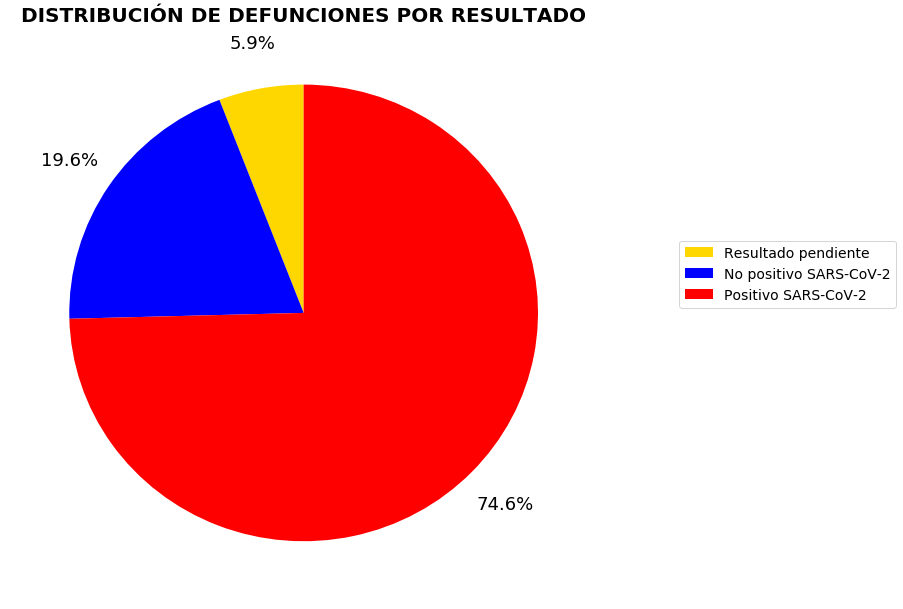

In [30]:
fig,ax = plt.subplots()

fig.set_size_inches(10.5, 10.5)

labels=defunciones_resultado["RESULTADO"]
sizes=defunciones_resultado["NUM_CASOS"]
colors=["gold","blue","red"]

pie= plt.pie(sizes,colors=colors,
        autopct="%1.1f%%",textprops={'fontsize': 18},pctdistance=1.2,
       labels=None, startangle=-270)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc=3, fontsize=14, 
           bbox_transform=plt.gcf().transFigure)

plt.title("DISTRIBUCIÓN DE DEFUNCIONES POR RESULTADO", fontsize=20, weight="bold")


#### Muertes confirmadas por día

In [31]:
defunciones_covid_diarias=defunciones_consolidado_tiempo.loc[defunciones_consolidado_tiempo["RESULTADO"]=="Positivo SARS-CoV-2",:]
defunciones_covid_diarias=defunciones_covid_diarias.loc[:,["FECHA_DEF","ID_REGISTRO"]]

defunciones_covid_diarias=defunciones_covid_diarias.groupby(["FECHA_DEF"],as_index=False).count()
defunciones_covid_diarias=defunciones_covid_diarias.rename(columns={"ID_REGISTRO":"NUM_CASOS_COVID"})                                                          
defunciones_covid_diarias.head()

,FECHA_DEF,NUM_CASOS_COVID
0,2020-03-18,2
1,2020-03-20,1
2,2020-03-22,1
3,2020-03-23,1
4,2020-03-24,2


In [32]:
max_covid_dia=defunciones_covid_diarias.loc[defunciones_covid_diarias["NUM_CASOS_COVID"]==max(defunciones_covid_diarias["NUM_CASOS_COVID"]),:]
max_covid_dia

,FECHA_DEF,NUM_CASOS_COVID
82,2020-06-10,509


Text(0.5,1,'DEFUNCIONES CON RESULTADO POSITIVO A SARS-COV-2')

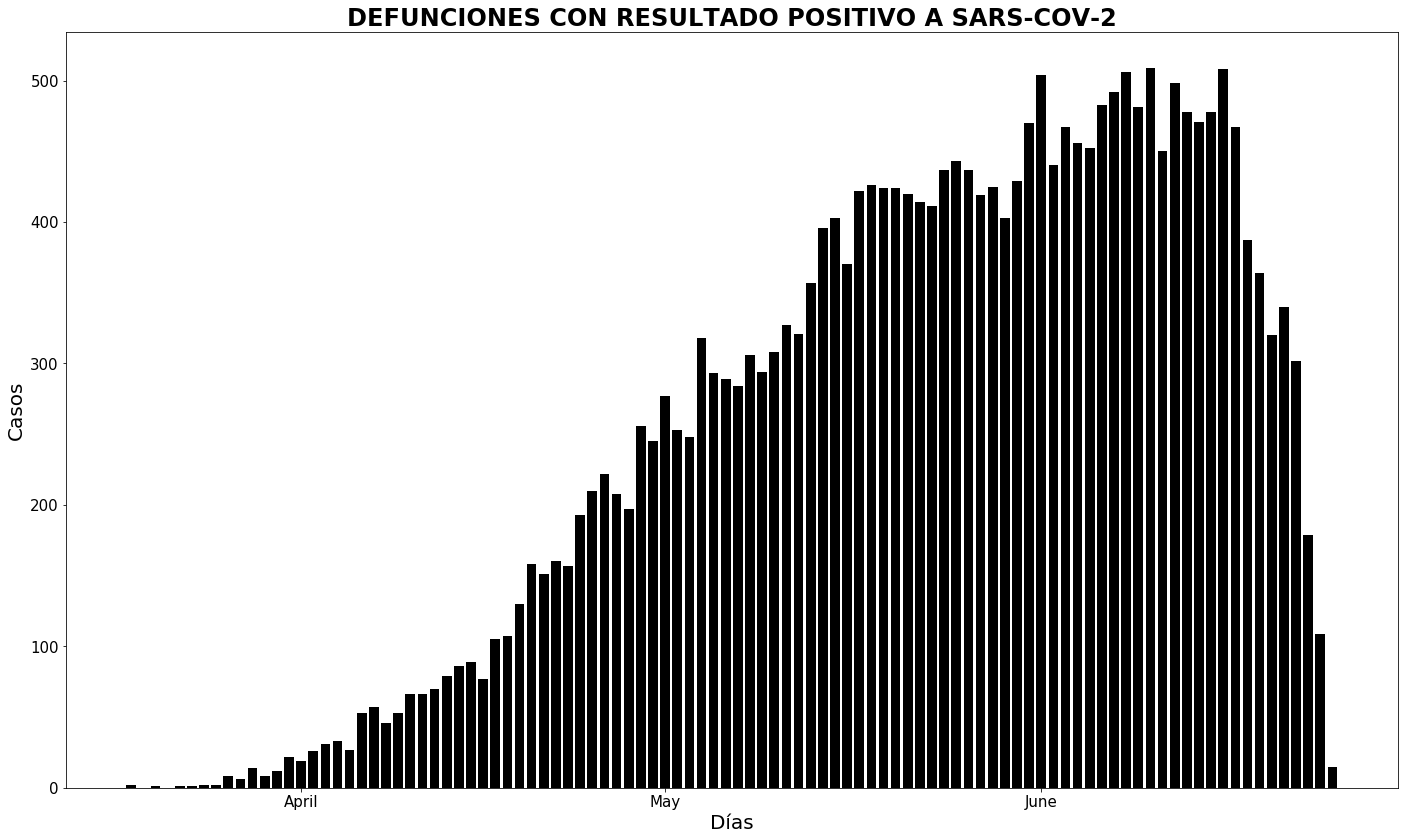

In [76]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(18.5, 10.5)
y_axis=defunciones_covid_diarias["FECHA_DEF"]
x_axis=defunciones_covid_diarias["NUM_CASOS_COVID"]
ax.bar(y_axis,x_axis,color="black")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.set_xlabel("Días",fontsize=20)
ax.set_ylabel("Casos", fontsize=20)

ax.tick_params(labelsize=15)


ax.set_title("DEFUNCIONES CON RESULTADO POSITIVO A SARS-COV-2", fontsize=24, weight="bold")


In [34]:
defunciones_sospechosas_diarias=defunciones_consolidado_tiempo.loc[defunciones_consolidado_tiempo["RESULTADO"]=="Resultado pendiente",:]
defunciones_sospechosas_diarias=defunciones_sospechosas_diarias.loc[:,["FECHA_DEF","ID_REGISTRO"]]

defunciones_sospechosas_diarias=defunciones_sospechosas_diarias.groupby(["FECHA_DEF"],as_index=False).count()
defunciones_sospechosas_diarias=defunciones_sospechosas_diarias.rename(columns={"ID_REGISTRO":"NUM_CASOS_SOSPECHOSOS"})
defunciones_sospechosas_diarias.head()

,FECHA_DEF,NUM_CASOS_SOSPECHOSOS
0,2020-04-09,1
1,2020-04-13,1
2,2020-04-14,2
3,2020-04-15,2
4,2020-04-16,2


In [35]:
max_sospechosas_dia=defunciones_sospechosas_diarias.loc[defunciones_sospechosas_diarias["NUM_CASOS_SOSPECHOSOS"]==max(defunciones_sospechosas_diarias["NUM_CASOS_SOSPECHOSOS"]),:]

max_sospechosas_dia

,FECHA_DEF,NUM_CASOS_SOSPECHOSOS
69,2020-06-23,109


Text(0.5,1,'DEFUNCIONES PENDIENTES DE RESULTADO')

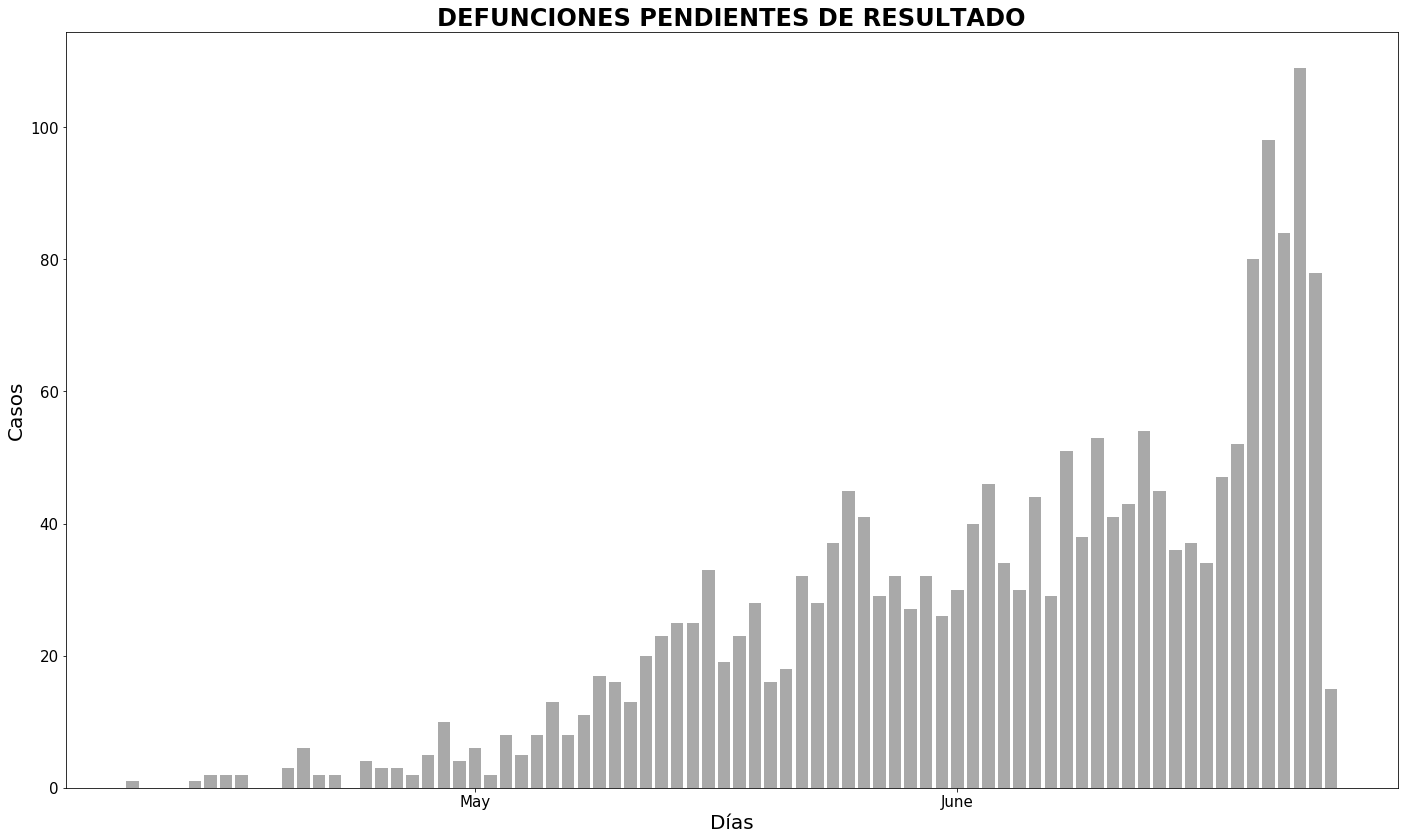

In [73]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(18.5, 10.5)
y_axis=defunciones_sospechosas_diarias["FECHA_DEF"]
x_axis=defunciones_sospechosas_diarias["NUM_CASOS_SOSPECHOSOS"]
ax.bar(y_axis,x_axis,color="darkgray")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.set_xlabel("Días",fontsize=20)
ax.set_ylabel("Casos", fontsize=20)

ax.tick_params(labelsize=15)

ax.set_title("DEFUNCIONES PENDIENTES DE RESULTADO", fontsize=24, weight="bold")

In [37]:
confirmadas_sospechosas_diarias=defunciones_covid_diarias.merge(defunciones_sospechosas_diarias,on="FECHA_DEF", how="outer")
confirmadas_sospechosas_diarias.head()

,FECHA_DEF,NUM_CASOS_COVID,NUM_CASOS_SOSPECHOSOS
0,2020-03-18,2,NaN
1,2020-03-20,1,NaN
2,2020-03-22,1,NaN
3,2020-03-23,1,NaN
4,2020-03-24,2,NaN


Text(0.5,1,'DEFUNCIONES CONFIRMADAS POR SARS-COV-2 Y PENDIENTES DE RESULTADO')

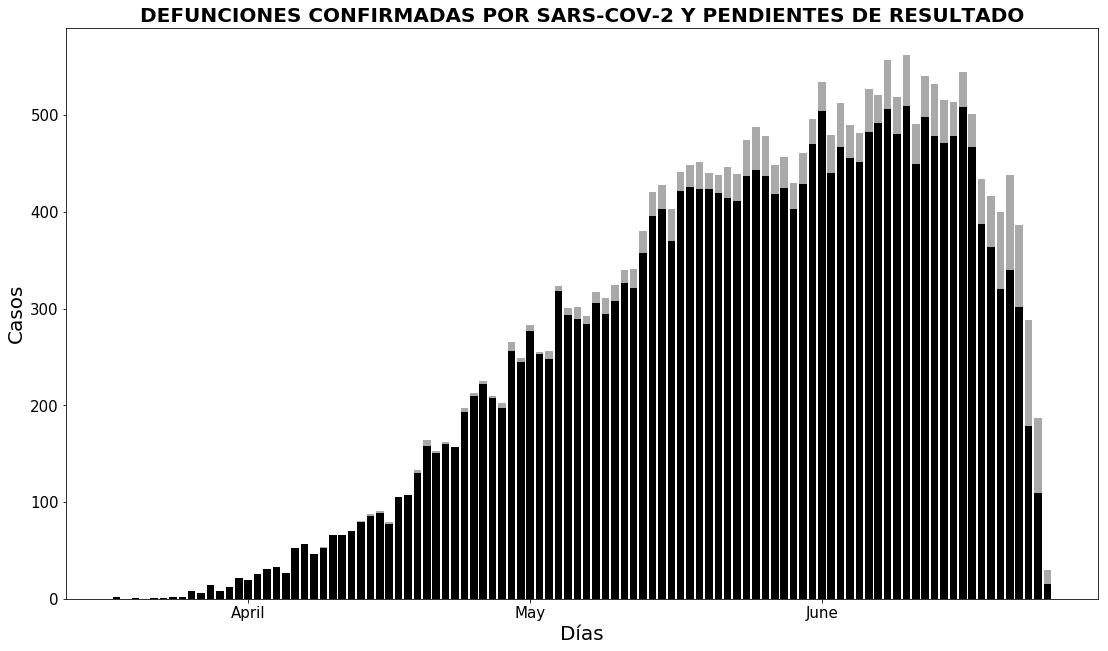

In [74]:
fig,ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
x_axis=confirmadas_sospechosas_diarias["NUM_CASOS_COVID"]
x_axis2=confirmadas_sospechosas_diarias["NUM_CASOS_SOSPECHOSOS"]
y_axis=confirmadas_sospechosas_diarias["FECHA_DEF"]

ax.bar(y_axis,x_axis, color="black")
ax.bar(y_axis,x_axis2, bottom=x_axis, color="darkgray")


ax.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.set_xlabel("Días",fontsize=20)
ax.set_ylabel("Casos", fontsize=20)

ax.tick_params(labelsize=15)

ax.set_title("DEFUNCIONES CONFIRMADAS POR SARS-COV-2 Y PENDIENTES DE RESULTADO", fontsize=20, weight="bold")

In [39]:
defunciones_consolidado_tiempo.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION,RANGO_ATRASO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2,72hrs
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0,72hrs
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10,2 semanas
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5,1 semana
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24,+2 semanas


In [40]:
defunciones_covid_atraso=defunciones_consolidado_tiempo.loc[defunciones_consolidado_tiempo["RESULTADO"]=="Positivo SARS-CoV-2",:]
defunciones_covid_atraso.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION,RANGO_ATRASO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2,72hrs
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0,72hrs
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10,2 semanas
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5,1 semana
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24,+2 semanas


### INCONSISTENCIA 3: FECHA NOTIFICACIÓN PREVIA A FECHA DEFUNCIÓN

Se eliminan los casos cuya fecha de notificación de defunción es menor a la fecha de defunción registrada

In [41]:
inconsistencia_3=defunciones_covid_atraso.loc[defunciones_covid_atraso["ATRASO_NOTIFICACION"]<0,:]
inconsistencia_3

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION,RANGO_ATRASO
4850,04586d,2020-04-23,2020-04-24,QUINTANA ROO,Positivo SARS-CoV-2,-1,NaN
19877,12323c,2020-05-12,2020-05-14,MÉXICO,Positivo SARS-CoV-2,-2,NaN
28276,19b4b6,2020-06-02,2020-06-11,MORELOS,Positivo SARS-CoV-2,-9,NaN


In [42]:
defunciones_covid_atraso=defunciones_covid_atraso.loc[defunciones_covid_atraso["ATRASO_NOTIFICACION"]>=0,:]
defunciones_covid_atraso.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION,RANGO_ATRASO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2,72hrs
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0,72hrs
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10,2 semanas
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5,1 semana
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24,+2 semanas


### DEFUNCIONES CONFIRMADAS POR COVID Y ATRASO EN CONFIRMACIÓN 

In [43]:
resumen_defunciones_covid_atraso=defunciones_covid_atraso.loc[:,["ATRASO_NOTIFICACION"]]
resumen_defunciones_covid_atraso.describe()

,ATRASO_NOTIFICACION
count,25057.000000
mean,7.972183
std,10.548744
min,0.000000
25%,2.000000
50%,4.000000
75%,10.000000
max,82.000000


In [44]:
resumen_defunciones_covid_atraso_ajustado=defunciones_covid_atraso.loc[defunciones_covid_atraso["FECHA_DEF"]>=primer_reporte,:]
resumen_defunciones_covid_atraso_ajustado=resumen_defunciones_covid_atraso_ajustado.loc[:,["ATRASO_NOTIFICACION"]]
resumen_defunciones_covid_atraso_ajustado.describe()

,ATRASO_NOTIFICACION
count,24501.000000
mean,7.890453
std,10.490649
min,0.000000
25%,2.000000
50%,3.000000
75%,9.000000
max,72.000000


In [45]:
defunciones_covid_rango=defunciones_covid_atraso.loc[:,["RANGO_ATRASO","ID_REGISTRO"]]
defunciones_covid_rango=defunciones_covid_rango.groupby(["RANGO_ATRASO"],as_index=False).count()
defunciones_covid_rango=defunciones_covid_rango.rename(columns={"ID_REGISTRO":"NUM_CASOS_COVID"})
defunciones_covid_rango

,RANGO_ATRASO,NUM_CASOS_COVID
0,72hrs,12515
1,1 semana,4835
2,2 semanas,3488
3,+2 semanas,4219


In [46]:
defunciones_covid_rango_ajustado=defunciones_covid_atraso.loc[:,["FECHA_DEF","RANGO_ATRASO","ID_REGISTRO"]]
defunciones_covid_rango_ajustado=defunciones_covid_rango_ajustado.loc[defunciones_covid_rango_ajustado["FECHA_DEF"]>=primer_reporte,:]
defunciones_covid_rango_ajustado=defunciones_covid_rango_ajustado.loc[:,["RANGO_ATRASO","ID_REGISTRO"]]

defunciones_covid_rango_ajustado=defunciones_covid_rango_ajustado.groupby(["RANGO_ATRASO"],as_index=False).count()
defunciones_covid_rango_ajustado=defunciones_covid_rango_ajustado.rename(columns={"ID_REGISTRO":"NUM_CASOS_COVID*"})
defunciones_covid_rango_ajustado

,RANGO_ATRASO,NUM_CASOS_COVID*
0,72hrs,12436
1,1 semana,4675
2,2 semanas,3285
3,+2 semanas,4105


Text(0.5,1,'TIEMPO TRANSCURRIDO ENTRE DEFUNCIÓN Y FECHA DE REGISTRO COMO CASO POSITIVO SARS-CoV-2')

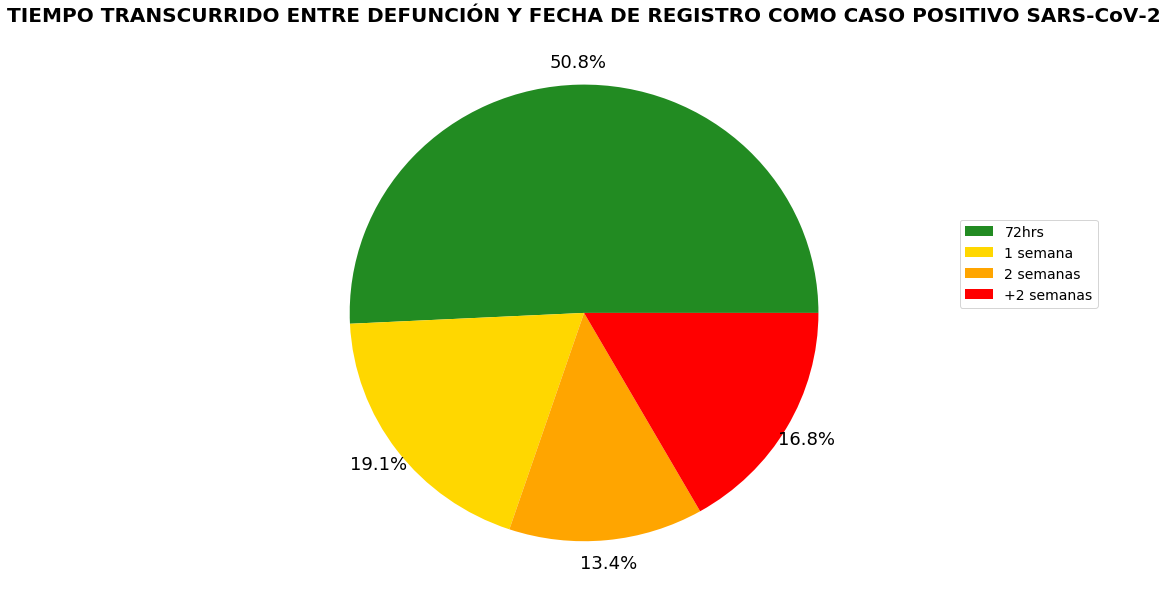

In [71]:
fig,ax = plt.subplots()

fig.set_size_inches(10.5, 10.5)

labels=defunciones_covid_rango_ajustado["RANGO_ATRASO"]
sizes=defunciones_covid_rango_ajustado["NUM_CASOS_COVID*"]
colors=["forestgreen","gold","orange","red"]

pie=plt.pie(sizes,colors=colors,
            autopct="%1.1f%%",textprops={'fontsize': 18},pctdistance=1.1,
            labels=None, startangle=0)

plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc=3, fontsize=14, 
           bbox_transform=plt.gcf().transFigure)

plt.title("TIEMPO TRANSCURRIDO ENTRE DEFUNCIÓN Y FECHA DE REGISTRO COMO CASO POSITIVO SARS-CoV-2", fontsize=20, weight="bold")



In [48]:
defunciones_covid_atraso.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_DEF,ENTIDAD_UM,RESULTADO,ATRASO_NOTIFICACION,RANGO_ATRASO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2,72hrs
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0,72hrs
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10,2 semanas
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5,1 semana
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24,+2 semanas


In [49]:
defunciones_covid_atraso_3dias=defunciones_covid_atraso.loc[defunciones_covid_atraso["RANGO_ATRASO"]=="72hrs",:]
defunciones_covid_atraso_3dias=defunciones_covid_atraso_3dias.loc[:,["ID_REGISTRO","FECHA_DEF"]]
defunciones_covid_atraso_3dias=defunciones_covid_atraso_3dias.groupby(["FECHA_DEF"],as_index=False).count()

In [50]:
defunciones_covid_atraso_1sem=defunciones_covid_atraso.loc[defunciones_covid_atraso["RANGO_ATRASO"]=="1 semana",:]
defunciones_covid_atraso_1sem=defunciones_covid_atraso_1sem.loc[:,["ID_REGISTRO","FECHA_DEF"]]
defunciones_covid_atraso_1sem=defunciones_covid_atraso_1sem.groupby(["FECHA_DEF"],as_index=False).count()

In [51]:
defunciones_covid_atraso_2sem=defunciones_covid_atraso.loc[defunciones_covid_atraso["RANGO_ATRASO"]=="2 semanas",:]
defunciones_covid_atraso_2sem=defunciones_covid_atraso_2sem.loc[:,["ID_REGISTRO","FECHA_DEF"]]
defunciones_covid_atraso_2sem=defunciones_covid_atraso_2sem.groupby(["FECHA_DEF"],as_index=False).count()

In [52]:
defunciones_covid_atraso_2semplus=defunciones_covid_atraso.loc[defunciones_covid_atraso["RANGO_ATRASO"]=="+2 semanas",:]
defunciones_covid_atraso_2semplus=defunciones_covid_atraso_2semplus.loc[:,["ID_REGISTRO","FECHA_DEF"]]
defunciones_covid_atraso_2semplus=defunciones_covid_atraso_2semplus.groupby(["FECHA_DEF"],as_index=False).count()

In [53]:
defunciones_diarias_covid_atraso=defunciones_covid_atraso_3dias.merge(defunciones_covid_atraso_1sem,on="FECHA_DEF",how="outer")
defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.rename(columns={"ID_REGISTRO_x":"3_DIAS","ID_REGISTRO_y":"1_SEMANA"})

defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.merge(defunciones_covid_atraso_2sem,on="FECHA_DEF",how="outer")
defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.rename(columns={"ID_REGISTRO":"2_SEMANAS"})

defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.merge(defunciones_covid_atraso_2semplus,on="FECHA_DEF",how="outer")
defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.rename(columns={"ID_REGISTRO":"+2_SEMANAS"})

defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.sort_values(by=["FECHA_DEF"])

defunciones_diarias_covid_atraso=defunciones_diarias_covid_atraso.fillna(0)

defunciones_diarias_covid_atraso.tail(20)

,FECHA_DEF,3_DIAS,1_SEMANA,2_SEMANAS,+2_SEMANAS
58,2020-06-06,260.0,113.0,64.0,46.0
59,2020-06-07,304.0,67.0,92.0,29.0
60,2020-06-08,345.0,55.0,87.0,19.0
61,2020-06-09,307.0,63.0,88.0,23.0
62,2020-06-10,324.0,97.0,76.0,12.0
63,2020-06-11,242.0,128.0,79.0,0.0
64,2020-06-12,246.0,176.0,76.0,0.0
65,2020-06-13,291.0,124.0,63.0,0.0
66,2020-06-14,341.0,82.0,48.0,0.0
67,2020-06-15,315.0,104.0,59.0,0.0


In [54]:
defunciones_diarias_covid_atraso.dtypes

FECHA_DEF     datetime64[ns]
3_DIAS               float64
1_SEMANA             float64
2_SEMANAS            float64
+2_SEMANAS           float64
dtype: object

Text(0.5,1,'ATRASO EN CONFIRMACIÓN DE DEFUNCIONES POSITIVAS A SARS-COV-2')

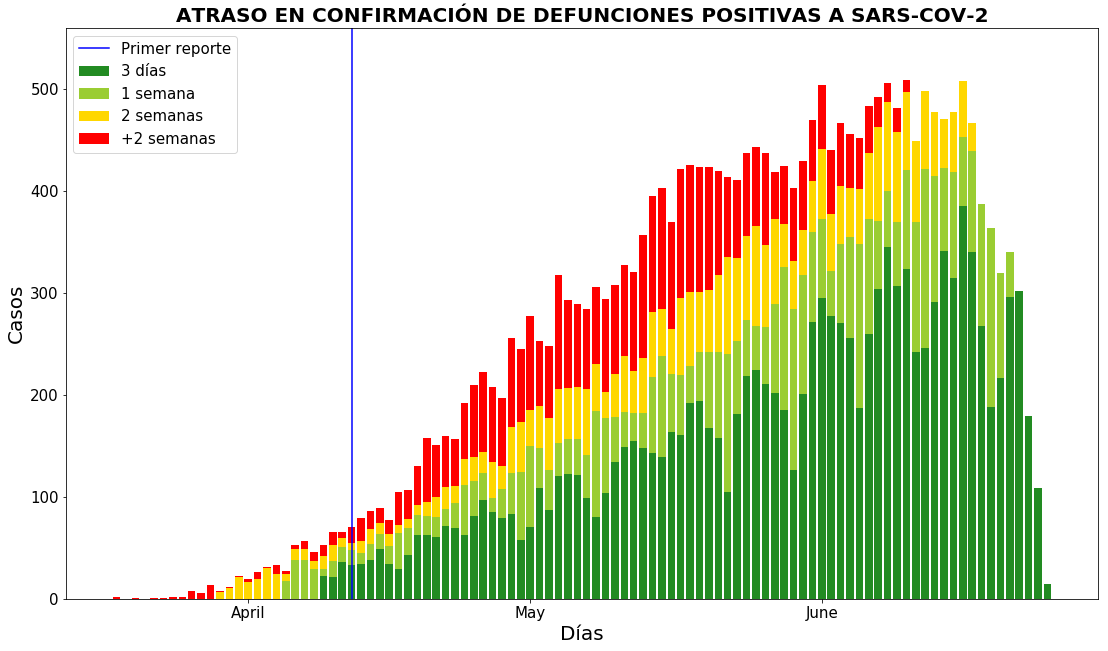

In [70]:
fig,ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
x_axis=defunciones_diarias_covid_atraso["3_DIAS"]
x_axis2=defunciones_diarias_covid_atraso["1_SEMANA"]
x_axis3=defunciones_diarias_covid_atraso["2_SEMANAS"]
x_axis4=defunciones_diarias_covid_atraso["+2_SEMANAS"]
y_axis=defunciones_diarias_covid_atraso["FECHA_DEF"]

bars=np.add(defunciones_diarias_covid_atraso["3_DIAS"],defunciones_diarias_covid_atraso["1_SEMANA"]).tolist()
bars2=np.add(bars,defunciones_diarias_covid_atraso["2_SEMANAS"]).tolist()
bars3=np.add(bars2,defunciones_diarias_covid_atraso["+2_SEMANAS"]).tolist()

axes = plt.gca()
axes.set_ylim([0,int(max_covid_dia["NUM_CASOS_COVID"].iloc[0])*1.1])

ax.bar(y_axis,x_axis, color="forestgreen",label="3 días")
ax.bar(y_axis,x_axis2, bottom=x_axis, color="yellowgreen", label="1 semana")
ax.bar(y_axis,x_axis3, bottom=bars, color="gold",label="2 semanas")
ax.bar(y_axis,x_axis4, bottom=bars2, color="red",label="+2 semanas")

plt.axvline(x=primer_reporte,color="blue",label="Primer reporte")

plt.legend(fontsize=15)

ax.set_xlabel("Días",fontsize=20)
ax.set_ylabel("Casos", fontsize=20)

ax.tick_params(labelsize=15)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_title("ATRASO EN CONFIRMACIÓN DE DEFUNCIONES POSITIVAS A SARS-COV-2", fontsize=20, weight="bold")

### DEFUNCIONES COVID CONFIRMADAS: HISTORIAL DE REPORTES

In [56]:
total_dbs.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [57]:
#Obtener fecha en la cual el ID_REGISTRO fue incluida en las bases de datos 
#(primera base de datos en la cual aparece el ID)

primer_registro_ID=total_dbs.loc[:,["FECHA_ACTUALIZACION","ID_REGISTRO"]]
primer_registro_ID=primer_registro_ID.groupby(["ID_REGISTRO"],as_index=False).min()
primer_registro_ID=primer_registro_ID.rename(columns={"FECHA_ACTUALIZACION":"FECHA_ID_PRIMER_REPORTE"})
primer_registro_ID.head()

,ID_REGISTRO,FECHA_ID_PRIMER_REPORTE
0,00000e,2020-06-12
1,000013,2020-05-17
2,000015,2020-06-10
3,00001b,2020-06-08
4,00001e,2020-05-27


In [58]:
#AUXILIAR: Obtener de la base completa la información para cruzar con el reporte del primer registro de cada ID

primer_registro_status_auxiliar=total_dbs.loc[:,["ID_REGISTRO","FECHA_ACTUALIZACION","FECHA_DEF","RESULTADO"]]
primer_registro_status_auxiliar=primer_registro_status_auxiliar.rename(columns={"RESULTADO":"RESULTADO_INICIAL", 
                                                                                "FECHA_ACTUALIZACION":"FECHA_ID_PRIMER_REPORTE"})
primer_registro_status_auxiliar.head()

,ID_REGISTRO,FECHA_ID_PRIMER_REPORTE,FECHA_DEF,RESULTADO_INICIAL
0,09e8dc,2020-04-12,9999-99-99,Positivo SARS-CoV-2
1,0efbaf,2020-04-12,9999-99-99,Positivo SARS-CoV-2
2,091a48,2020-04-12,9999-99-99,No positivo SARS-CoV-2
3,13236c,2020-04-12,9999-99-99,No positivo SARS-CoV-2
4,0cdb12,2020-04-12,9999-99-99,Positivo SARS-CoV-2


In [59]:
#Obtener estado de paciente (Vivo - Fallecido) y Resultado de Prueba en el primer reporte de cada ID_REGISTRO
#Vivo: FECHA_DEF = "9999-99-99"
#Fallecido: FECHA_DEF != "9999-99-99"

primer_registro_ID_status=primer_registro_ID.merge(primer_registro_status_auxiliar,
                                                   left_on=["ID_REGISTRO","FECHA_ID_PRIMER_REPORTE"],
                                                   right_on=["ID_REGISTRO","FECHA_ID_PRIMER_REPORTE"],
                                                  how="left")
primer_registro_ID_status=primer_registro_ID_status.rename(columns={"FECHA_DEF":"STATUS_INICIAL"})
primer_registro_ID_status=primer_registro_ID_status.loc[:,["ID_REGISTRO","FECHA_ID_PRIMER_REPORTE","STATUS_INICIAL","RESULTADO_INICIAL"]]
primer_registro_ID_status.head()

,ID_REGISTRO,FECHA_ID_PRIMER_REPORTE,STATUS_INICIAL,RESULTADO_INICIAL
0,00000e,2020-06-12,9999-99-99,Resultado pendiente
1,000013,2020-05-17,9999-99-99,Resultado pendiente
2,000015,2020-06-10,9999-99-99,Resultado pendiente
3,00001b,2020-06-08,9999-99-99,Resultado pendiente
4,00001e,2020-05-27,9999-99-99,Positivo SARS-CoV-2


In [60]:
#primer_registro_UCI_auxiliar, obtiene información de ID_REGISTRO, FECHA_ACTUALIZACION, UCI, RESULTADO para identificar
#el primer registro de uso de UCI

#primer_registro_UCI, base con información de fecha de primer registro con UCI, y RESULTADO en esa fecha

primer_registro_UCI_auxiliar=total_dbs.loc[:,["ID_REGISTRO","FECHA_ACTUALIZACION","UCI","RESULTADO"]]
primer_registro_UCI_auxiliar=primer_registro_UCI_auxiliar.loc[primer_registro_UCI_auxiliar["UCI"].str.contains("SI"),:]

primer_registro_UCI=primer_registro_UCI_auxiliar.loc[:,["ID_REGISTRO","FECHA_ACTUALIZACION","UCI"]]
primer_registro_UCI=primer_registro_UCI.groupby(["ID_REGISTRO","UCI"], as_index=False).min()
primer_registro_UCI=primer_registro_UCI.merge(primer_registro_UCI_auxiliar,on=["ID_REGISTRO","FECHA_ACTUALIZACION","UCI"])
primer_registro_UCI=primer_registro_UCI.rename(columns={"FECHA_ACTUALIZACION":"FECHA_UCI"})
primer_registro_UCI.head()

,ID_REGISTRO,UCI,FECHA_UCI,RESULTADO
0,00002d,SI,2020-06-06,Resultado pendiente
1,000057,SI,2020-05-18,Resultado pendiente
2,0002e1,SI,2020-05-26,Positivo SARS-CoV-2
3,0003b6,SI,2020-06-16,Resultado pendiente
4,00053f,SI,2020-06-03,Positivo SARS-CoV-2


In [61]:
defunciones_consolidado=defunciones_consolidado_tiempo.merge(primer_registro_ID_status,on=["ID_REGISTRO"])
defunciones_consolidado=defunciones_consolidado.rename(columns={"FECHA_ACTUALIZACION":"FECHA_PRIMER_REPORTE_DEFUNCION",
                                                                             "RESULTADO":"RESULTADO_ULTIMO"})
defunciones_consolidado["STATUS_INICIAL"]=defunciones_consolidado["STATUS_INICIAL"].replace("9999-99-99","Vivo")
defunciones_consolidado["STATUS_INICIAL"][defunciones_consolidado["STATUS_INICIAL"]!="Vivo"]="Fallecido"
defunciones_consolidado=defunciones_consolidado.merge(primer_registro_UCI,how="left",on="ID_REGISTRO")
defunciones_consolidado.head()

C:\Users\varicoj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ID_REGISTRO,FECHA_PRIMER_REPORTE_DEFUNCION,FECHA_DEF,ENTIDAD_UM,RESULTADO_ULTIMO,ATRASO_NOTIFICACION,RANGO_ATRASO,FECHA_ID_PRIMER_REPORTE,STATUS_INICIAL,RESULTADO_INICIAL,UCI,FECHA_UCI,RESULTADO
0,00000e,2020-06-13,2020-06-11,SINALOA,Positivo SARS-CoV-2,2,72hrs,2020-06-12,Vivo,Resultado pendiente,NaN,NaN,NaN
1,00002d,2020-06-09,2020-06-09,OAXACA,Positivo SARS-CoV-2,0,72hrs,2020-06-06,Vivo,Resultado pendiente,SI,2020-06-06,Resultado pendiente
2,00003f,2020-05-19,2020-05-09,GUERRERO,Positivo SARS-CoV-2,10,2 semanas,2020-05-07,Vivo,Resultado pendiente,NaN,NaN,NaN
3,000055,2020-06-03,2020-05-29,CIUDAD DE MÉXICO,Positivo SARS-CoV-2,5,1 semana,2020-05-15,Vivo,Resultado pendiente,NaN,NaN,NaN
4,000064,2020-06-24,2020-05-31,MÉXICO,Positivo SARS-CoV-2,24,+2 semanas,2020-05-14,Vivo,Resultado pendiente,NaN,NaN,NaN


In [62]:
defunciones_status_inicial=defunciones_consolidado.loc[:,["STATUS_INICIAL","ID_REGISTRO"]]
defunciones_status_inicial=defunciones_status_inicial.groupby(["STATUS_INICIAL"],as_index=False).count()
defunciones_status_inicial=defunciones_status_inicial.rename(columns={"ID_REGISTRO":"NUM_CASOS"})
defunciones_status_inicial

,STATUS_INICIAL,NUM_CASOS
0,Fallecido,4487
1,Vivo,29109


Text(0.5,1,'ESTADO DE LA PERSONA CUANDO FUE REGISTRADA EN LA BASE DE DATOS')

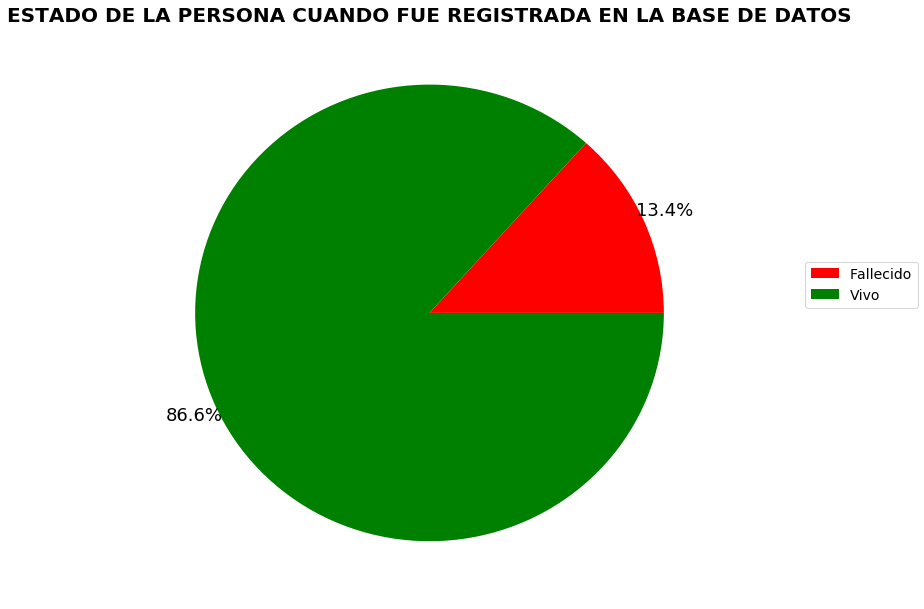

In [63]:
fig,ax = plt.subplots()

fig.set_size_inches(10.5, 10.5)

labels=defunciones_status_inicial["STATUS_INICIAL"]
sizes=defunciones_status_inicial["NUM_CASOS"]
colors=["red","green"]

pie=plt.pie(sizes,colors=colors,
            autopct="%1.1f%%",textprops={'fontsize': 18},pctdistance=1.1,
            labels=None, startangle=0)

plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc=3, fontsize=14, 
           bbox_transform=plt.gcf().transFigure)

plt.title("ESTADO DE LA PERSONA CUANDO FUE REGISTRADA EN LA BASE DE DATOS", fontsize=20, weight="bold")

In [64]:
defunciones_consolidado_resultados_evolucion=defunciones_consolidado.loc[:,["ID_REGISTRO","RESULTADO_INICIAL","RESULTADO_ULTIMO"]]
defunciones_consolidado_resultados_evolucion=defunciones_consolidado_resultados_evolucion.groupby(["RESULTADO_ULTIMO","RESULTADO_INICIAL"],as_index=False).count()
defunciones_consolidado_resultados_evolucion

,RESULTADO_ULTIMO,RESULTADO_INICIAL,ID_REGISTRO
0,No positivo SARS-CoV-2,No positivo SARS-CoV-2,1259
1,No positivo SARS-CoV-2,Positivo SARS-CoV-2,3
2,No positivo SARS-CoV-2,Resultado pendiente,5308
3,Positivo SARS-CoV-2,No positivo SARS-CoV-2,45
4,Positivo SARS-CoV-2,Positivo SARS-CoV-2,3703
5,Positivo SARS-CoV-2,Resultado pendiente,21312
6,Resultado pendiente,No positivo SARS-CoV-2,1
7,Resultado pendiente,Positivo SARS-CoV-2,2
8,Resultado pendiente,Resultado pendiente,1963


In [65]:
defunciones_consolidado_resultados_estado_inicial=defunciones_consolidado_status.loc[:,["ID_REGISTRO","STATUS_INICIAL","RESULTADO_INICIAL","RESULTADO_ULTIMO"]]
defunciones_consolidado_resultados_estado_inicial=defunciones_consolidado_resultados_estado_inicial.groupby(["RESULTADO_ULTIMO","STATUS_INICIAL","RESULTADO_INICIAL"],as_index=False).count()
defunciones_consolidado_resultados_estado_inicial=defunciones_consolidado_resultados_estado_inicial[["STATUS_INICIAL","RESULTADO_INICIAL","RESULTADO_ULTIMO","ID_REGISTRO"]]
defunciones_consolidado_resultados_estado_inicial

NameError: name 'defunciones_consolidado_status' is not defined

In [ ]:
defunciones_positivas_estado_inicial=defunciones_consolidado_resultados_estado_inicial.loc[defunciones_consolidado_resultados_estado_inicial["RESULTADO_ULTIMO"]=="Positivo SARS-CoV-2",:]
defunciones_positivas_estado_inicial

In [ ]:
#Fecha Actualización (mínima) Vs Fecha Defunción
    #Determinar % promedio de muertes totales notificadas en día 1, cuándo cada cuartil
    #Gráfica cajas

#Fecha Síntomas Vs Fecha Actualización (mínima) - Cuánto tarda la persona en acudir al médico en promedio

#% de letalidad con cada comorbilidad

#% de letalidad con intubación

#Respuesta de sospechosos promedio

#Casos que no fueron sospechosos